### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, **the company wishes to identify the most potential leads, also known as ‘Hot Leads’.** If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

The company requires you to build a model wherein you need to assign a **lead score** to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around **80%.**

### Step 1: Reading and Understanding the Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Reading Dataset
df = pd.read_csv("Leads.csv")
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
# Incresing the number of "columns to display" to 40 to view all columns.
pd.set_option('display.max_columns',40)
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [5]:
# Inspectiing the various aspects of the housing dataframe
df.shape

(9240, 37)

So, we have 37 variables and 9240 rows to start.

In [6]:
# Looking at the columns to see data types of variables, Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Checking Details and Stats for Numerical Column
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

### Step 2: Data Cleaning & EDA

#### 2.1 Renaming Columns
- Converting column names to lower case and inserting underscore for easy accessbilily.
- Renaming long columns to short as bigger column names are hard to read and also makes problem while plotting graphs.

In [8]:
#reducing columns names to lower str and inserting underscore to column names for easy accessibility.
df.columns=df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [9]:
# shorten column names
df.rename(columns = {'totalvisits': 'total_visits', 'total_time_spent_on_website': 'time_on_website', 
                    'how_did_you_hear_about_x_education': 'source',
                    'what_is_your_current_occupation': 'current_occupation',
                    'what_matters_most_to_you_in_choosing_a_course' : 'course_choosing_reason', 
                    'receive_more_updates_about_our_courses': 'receive_courses_updates', 
                    'update_me_on_supply_chain_content': 'scm_content_updates',
                    'get_updates_on_dm_content': 'dm_content_updates',
                    'i_agree_to_pay_the_amount_through_cheque': 'amount_through_cheque',
                    'a_free_copy_of_mastering_the_interview': 'mastering_interview'}, inplace = True)

df.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'total_visits',
       'time_on_website', 'page_views_per_visit', 'last_activity', 'country',
       'specialization', 'source', 'current_occupation',
       'course_choosing_reason', 'search', 'magazine', 'newspaper_article',
       'x_education_forums', 'newspaper', 'digital_advertisement',
       'through_recommendations', 'receive_courses_updates', 'tags',
       'lead_quality', 'scm_content_updates', 'dm_content_updates',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score', 'amount_through_cheque',
       'mastering_interview', 'last_notable_activity'],
      dtype='object')

#### 2.2 Cheching Duplicates
- Checking DUPLICATE values in the dataset so that it does not create problem while building model because they can skew the results and affect the accuracy of the model.

In [10]:
#check for duplicates
print(sum(df.duplicated(subset = 'prospect_id')) == 0)
print(sum(df.duplicated(subset = 'lead_number')) == 0)

True
True


#### 2.3 Removing Indentity Columns
- They typically do not provide any meaningful information for machine learning models.

In [11]:
#dropping Lead Number and Prospect ID since they have all unique values
df.drop(['prospect_id', 'lead_number'], axis=1, inplace = True)

#### 2.4 Treatment of Null Values

As mentioned in the problem statement, there are some categorical variables with have a level called **'Select'** which needs to be handled. 'Select' here means that perticular attribute is not available for that customer or the person has not select any of the available options for a perticular question in the form. So, it is as good as **null value** for the problem.

Let's first replace the 'Select' value with the NaN value and take a look at null values then.

In [12]:
#Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [13]:
round(100*(df.isnull().sum()/len(df.index)).sort_values(ascending=False),2)

source                         78.46
lead_profile                   74.19
lead_quality                   51.59
asymmetrique_activity_score    45.65
asymmetrique_profile_score     45.65
asymmetrique_profile_index     45.65
asymmetrique_activity_index    45.65
city                           39.71
specialization                 36.58
tags                           36.29
course_choosing_reason         29.32
current_occupation             29.11
country                        26.63
total_visits                    1.48
page_views_per_visit            1.48
last_activity                   1.11
lead_source                     0.39
dm_content_updates              0.00
scm_content_updates             0.00
amount_through_cheque           0.00
mastering_interview             0.00
lead_origin                     0.00
x_education_forums              0.00
receive_courses_updates         0.00
through_recommendations         0.00
digital_advertisement           0.00
newspaper                       0.00
n

- Dropping Columns with high percentage of NaN values because if a large proportion of the data is missing for a particular column, it may be difficult to draw accurate conclusions from that column. Also, missing values can reduce performance of the model.

In [14]:
#dropping cols with more than 45% missing values
col_NaN_45=df.columns

for i in col_NaN_45:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)
        
round(100*(df.isnull().sum()/len(df.index)).sort_values(ascending=False),2)

city                       39.71
specialization             36.58
tags                       36.29
course_choosing_reason     29.32
current_occupation         29.11
country                    26.63
total_visits                1.48
page_views_per_visit        1.48
last_activity               1.11
lead_source                 0.39
receive_courses_updates     0.00
scm_content_updates         0.00
lead_origin                 0.00
digital_advertisement       0.00
dm_content_updates          0.00
amount_through_cheque       0.00
mastering_interview         0.00
through_recommendations     0.00
magazine                    0.00
newspaper                   0.00
x_education_forums          0.00
newspaper_article           0.00
search                      0.00
time_on_website             0.00
converted                   0.00
do_not_call                 0.00
do_not_email                0.00
last_notable_activity       0.00
dtype: float64

Now we have following 6 columns with significant null values and we will look them one by one.
- city-                       39.71
- specialization-             36.58
- tags-                       36.29
- course_choosing_reason-     29.32
- current_occupation-         29.11
- country-                    26.63

##### Variable 1: "city"

In [15]:
#checking value counts of "city" column
df.city.value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: city, dtype: int64

- There is no category with significant high presence.
- Replacing NaN values with category "missing_city" so that while analysing data we have idea that these values are missing and will retain data as well. 

In [16]:
df.city = df.city.replace(np.nan,'missing_city')

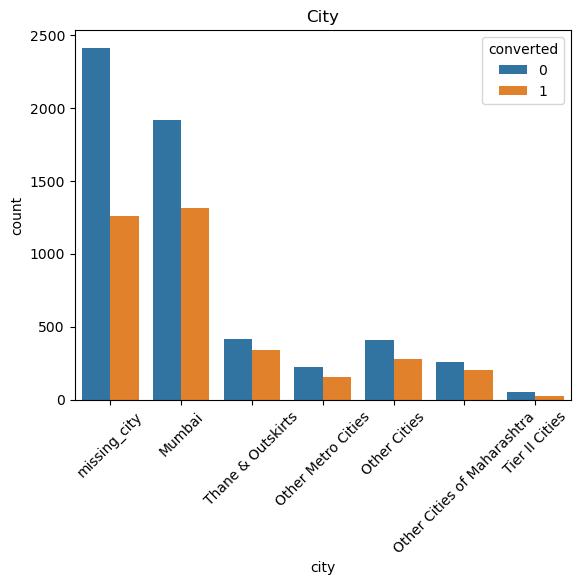

In [17]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(x='city', hue='converted', data = df)
plt.title('City')
plt.xticks(rotation=45)
plt.show()

##### Variable 2: "specialization"

In [18]:
#checking value counts of Specialization column
df.specialization.value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: specialization, dtype: int64

In [19]:
df.specialization = df.specialization.replace(np.nan, 'missing_specialization')

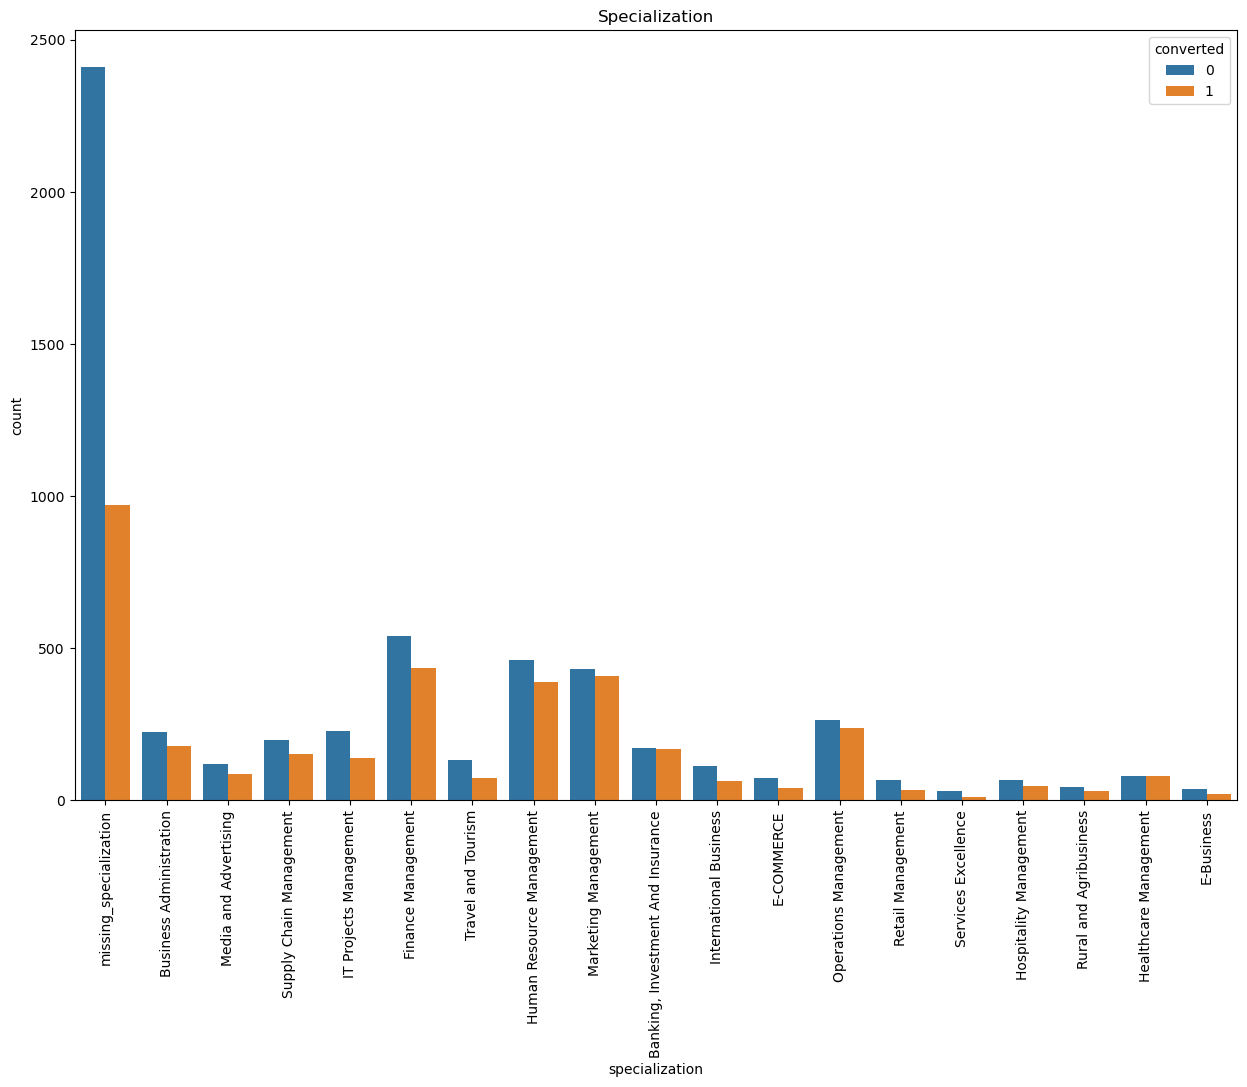

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(x='specialization', hue='converted', data = df)
plt.title('Specialization')
plt.xticks(rotation=90)
plt.show()

In [21]:
#combining Management Specializations because they show similar trends
df.specialization = df.specialization.replace(['Finance Management','Human Resource Management',
                                               'Marketing Management','Operations Management',
                                               'IT Projects Management','Supply Chain Management',
                                               'Healthcare Management','Hospitality Management',
                                               'Retail Management'],'Management_Specializations') 

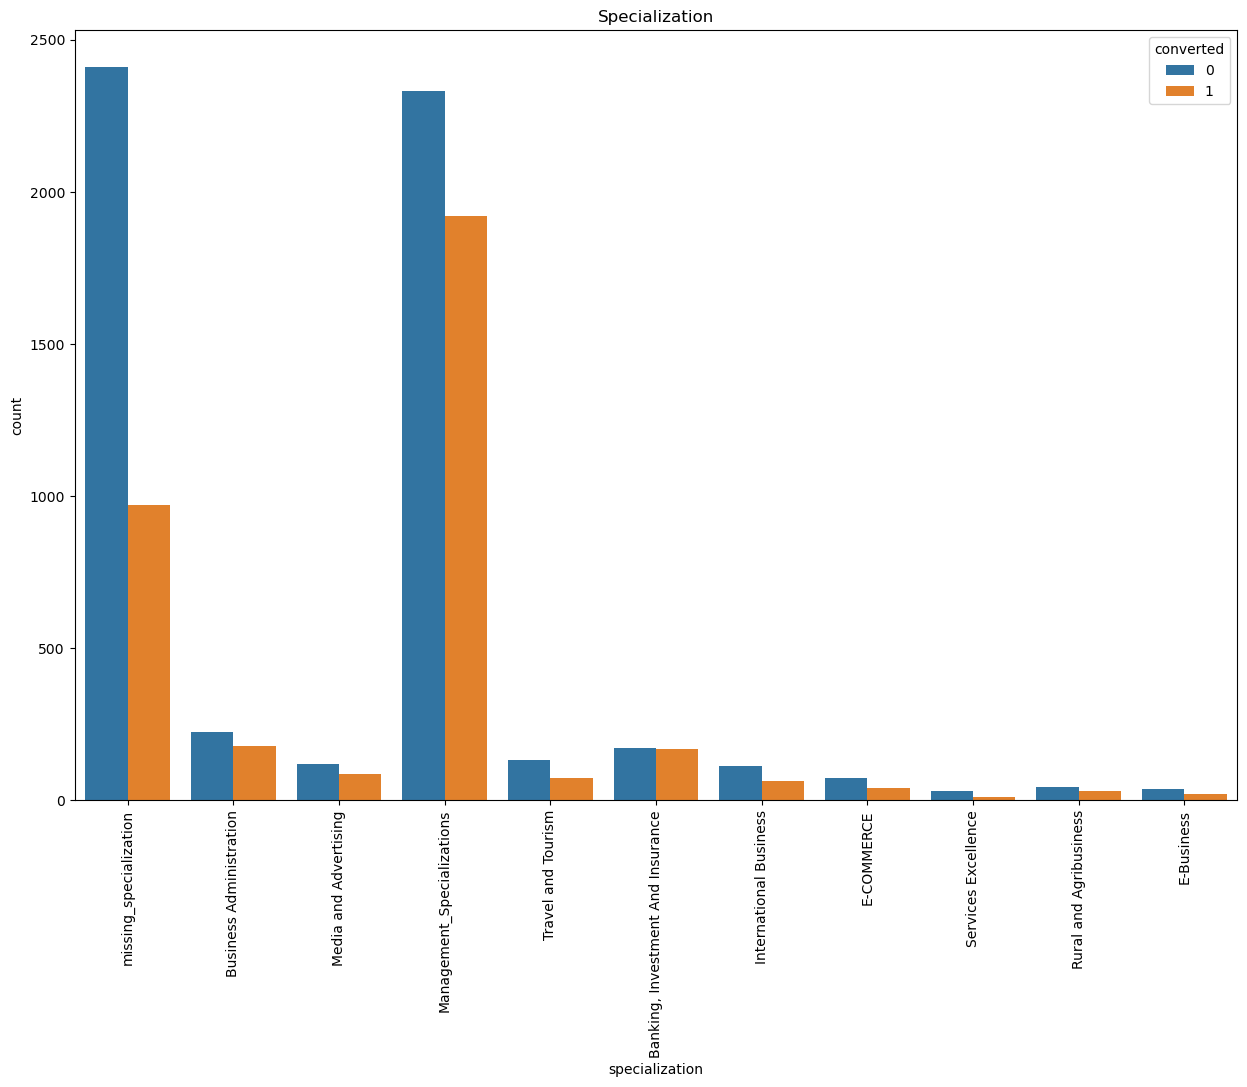

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(x='specialization', hue='converted', data = df)
plt.title('Specialization')
plt.xticks(rotation=90)
plt.show()

##### Variable 3: "tags"

In [23]:
#checking value counts of Tag variable
df.tags.value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [24]:
df.tags = df.tags.replace(np.nan,'missing_tag')

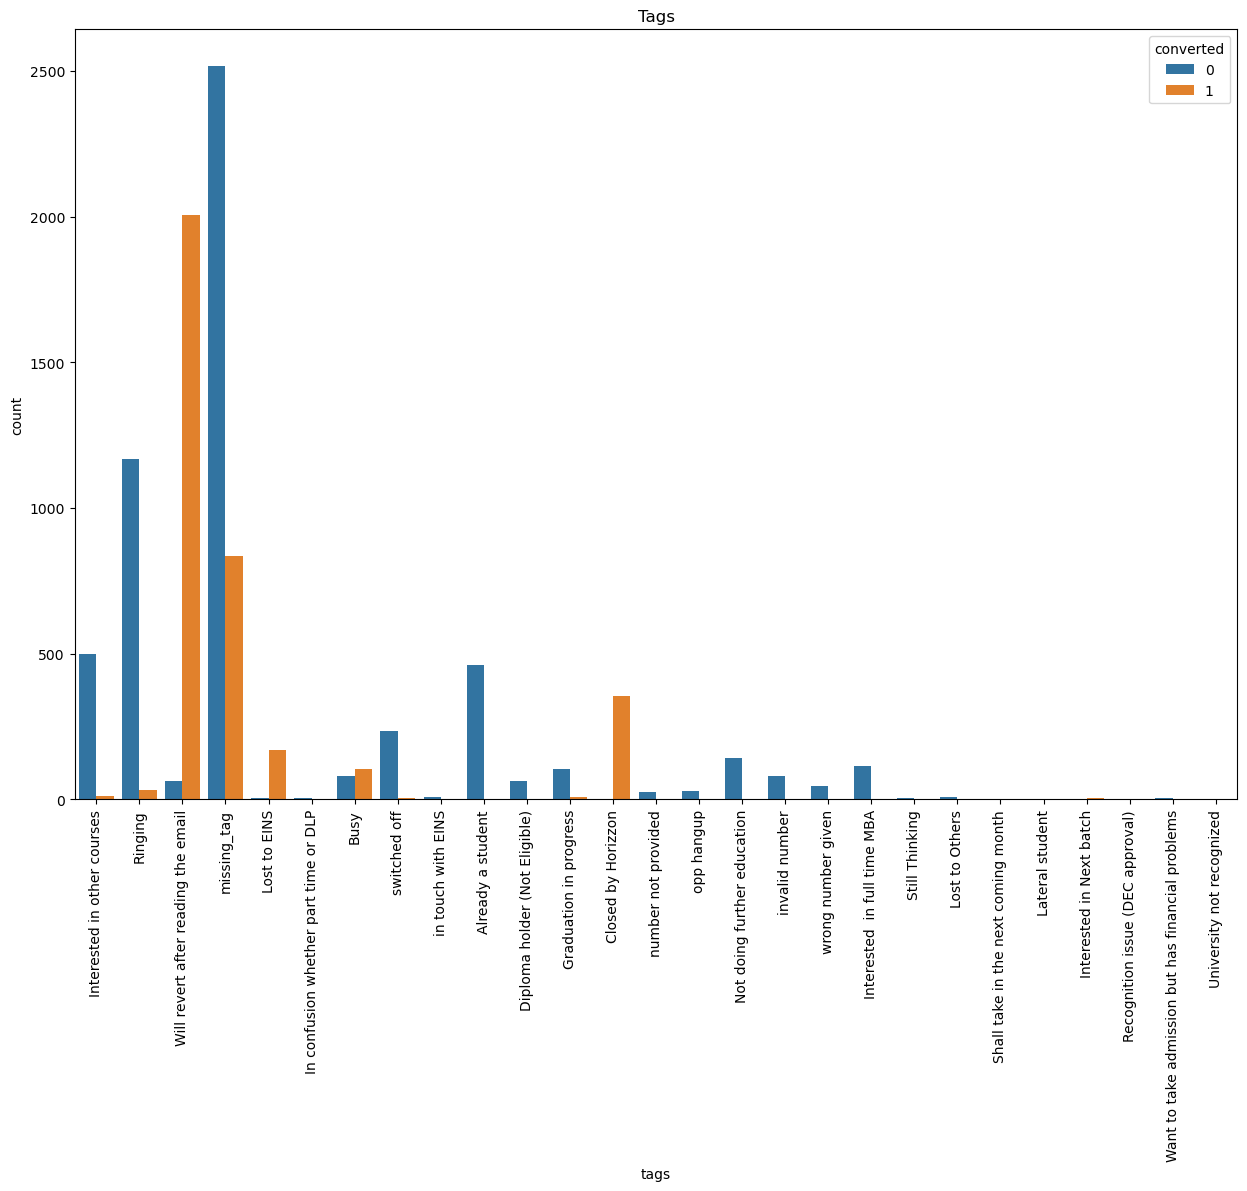

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(x='tags', hue='converted', data = df)
plt.title('Tags')
plt.xticks(rotation=90)
plt.show()

In [26]:
#replacing tags with low frequency with "other_tags"
df.tags = df.tags.replace(['In confusion whether part time or DLP','switched off','in touch with EINS','Already a student',
                           'Diploma holder (Not Eligible)','Graduation in progress',
                           'number not provided', 'opp hangup','Not doing further education',
                           'invalid number','wrong number given','Interested  in full time MBA',
                           'Still Thinking','Lost to Others','Shall take in the next coming month',
                           'Lateral student','Interested in Next batch','Recognition issue (DEC approval)',
                           'Want to take admission but has financial problems',
                           'University not recognized'], 'Other_Tags')

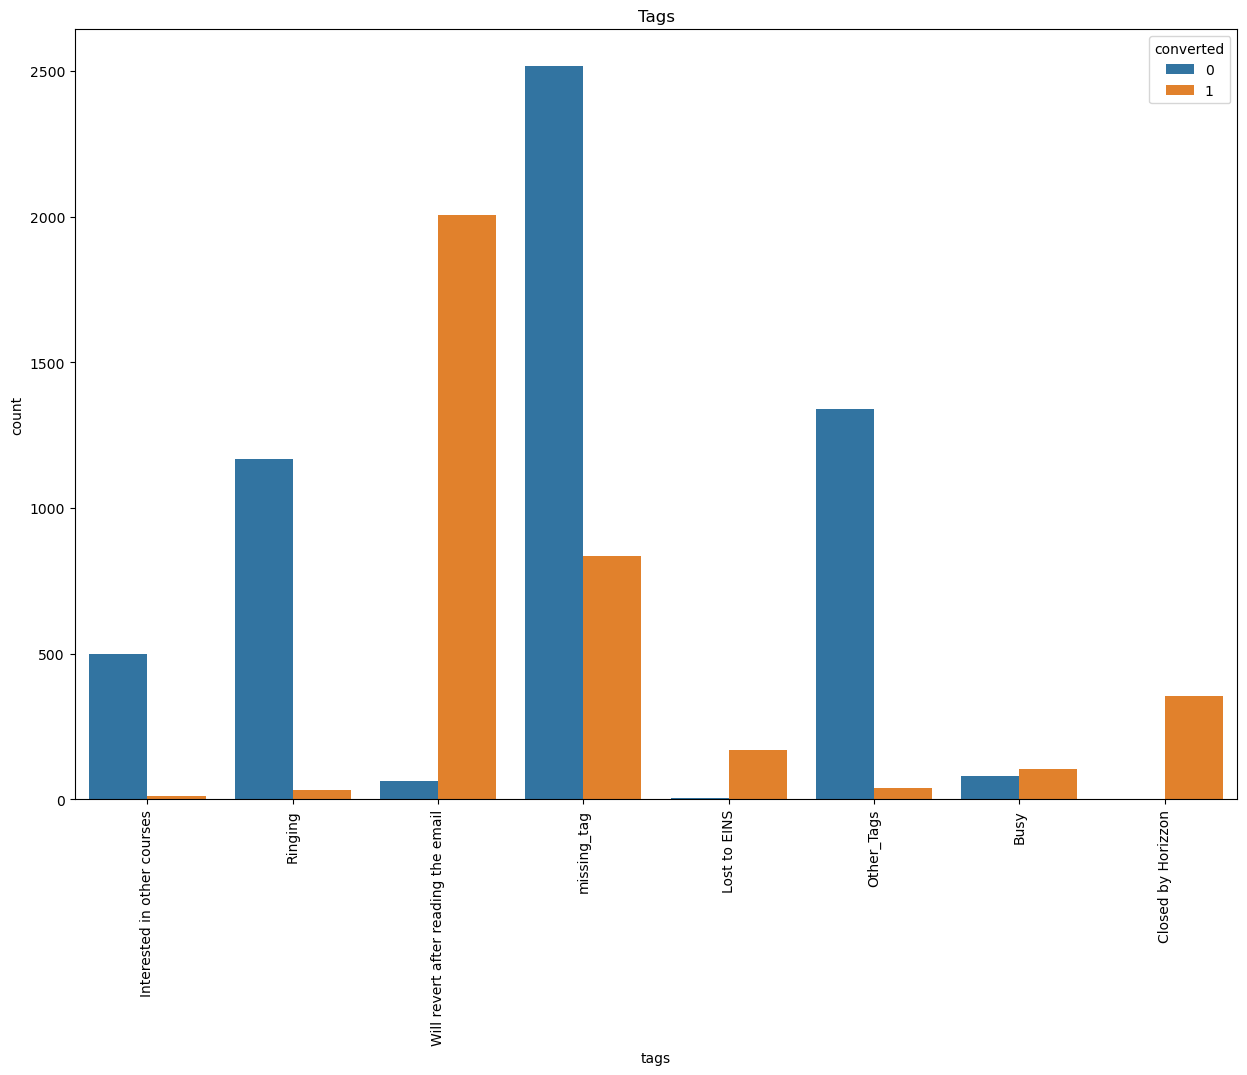

In [27]:
plt.figure(figsize=(15,10))
sns.countplot(x='tags', hue='converted', data = df)
plt.title('Tags')
plt.xticks(rotation=90)
plt.show()

If we see closely **'tags'**,tags assigned to customers <u>**indicating the current status of the lead**<u>.

It is the variable that is **not** being filled by a customer.
It has nothing to do with factors which contribute to predit whether the lead will convert or not.
So, dropping the "tags" variable.

In [28]:
#creating list to drop columns
columns_to_drop=['tags']

##### Variable 4: "course_choosing_reason"

In [29]:
#checking value counts of Tag variable
df.course_choosing_reason.value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: course_choosing_reason, dtype: int64

In [30]:
df.course_choosing_reason.value_counts(normalize=True, dropna=False)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: course_choosing_reason, dtype: float64

While looking at the data we can see that "Better Career Prospects"+"NaN" comprises approx 99% of the data it means this variable is highly skewed and can be dropped.

In [31]:
#creating list to drop columns
columns_to_drop.append('course_choosing_reason')

##### Variable 5: "current_occupation"

In [32]:
#checking value counts of Tag variable
df.current_occupation.value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: current_occupation, dtype: int64

In [33]:
#checking value counts of Tag variable
df.current_occupation.value_counts(normalize=True,dropna=False)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: current_occupation, dtype: float64

In [34]:
#replacing NaN values with "missing_occupation" & combining low frequency variables
df.current_occupation = df.current_occupation.replace(np.nan,'missing_occupation')
df.current_occupation = df.current_occupation.replace(['Businessman','Other','Housewife'],'Others')

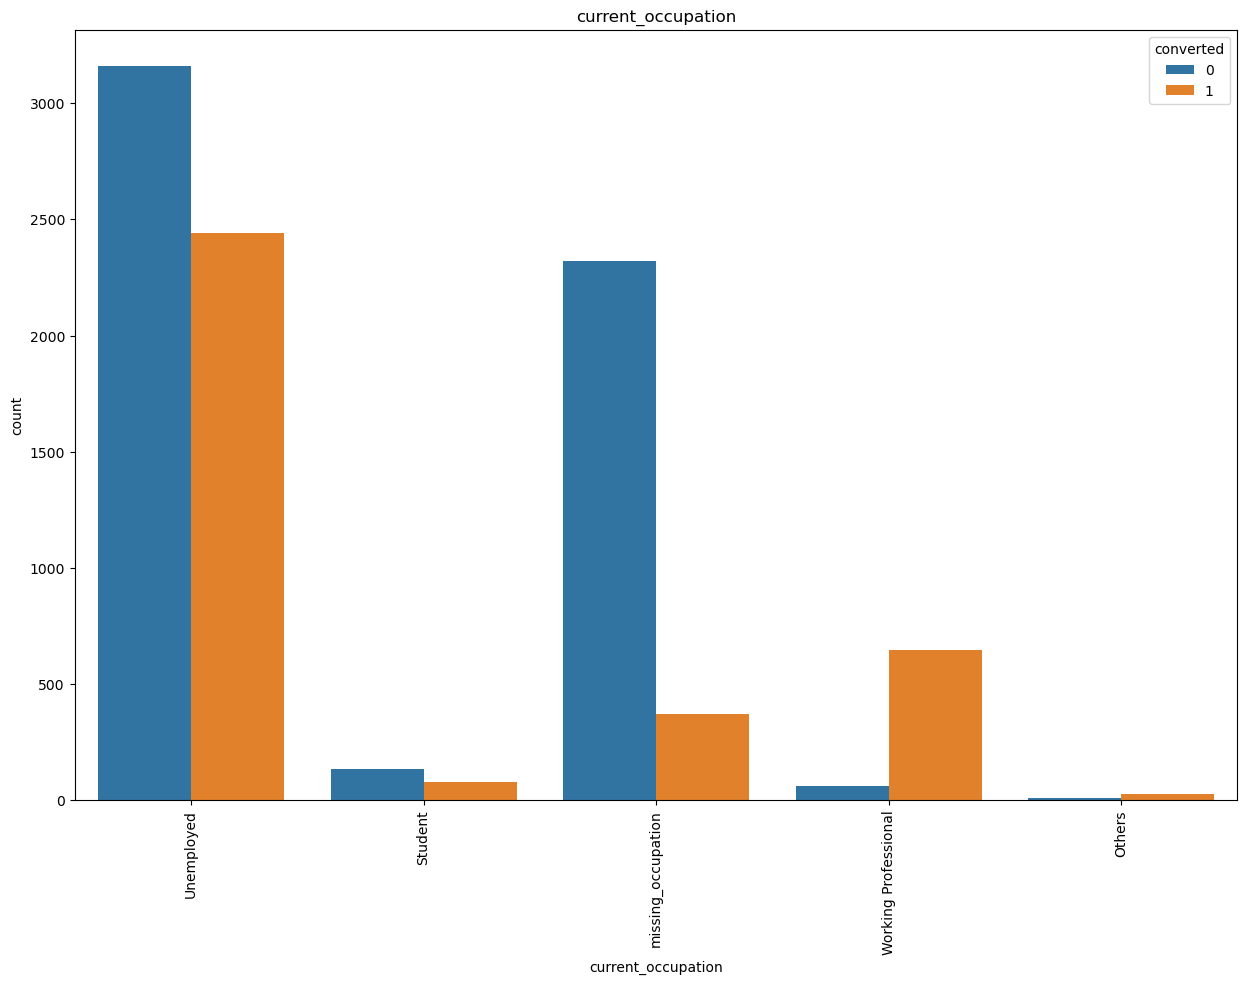

In [35]:
plt.figure(figsize=(15,10))
sns.countplot(x='current_occupation', hue='converted', data = df)
plt.title('current_occupation')
plt.xticks(rotation=90)
plt.show()

The graph shows the "Unemployed" & "Working Professional" have higher conversion percentage. Both seems to be important variable.

##### Variable 6: "country"

In [36]:
#checking value counts of "country" variable
df.country.value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [37]:
#checking percentage value counts of "country" variable
df.country.value_counts(normalize=True,dropna=False)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

While looking at the data we can see that "India"+"NaN" comprises approx 97% of the data it means this variable is highly skewed and can be dropped.

In [38]:
#Adding this variabel to "columns_to_drop" list.
columns_to_drop.append('country')

So, we have analysed the 6 variables with significant null value presence and treated the one by one.
We have 2 variables with highly skewed data, let's drop them and see the null values % again.

In [39]:
df.drop(columns=columns_to_drop,axis=1, inplace=True)

In [40]:
#Checking the Null Values again
round(100*(df.isnull().sum()/len(df.index)).sort_values(ascending=False),2)

total_visits               1.48
page_views_per_visit       1.48
last_activity              1.11
lead_source                0.39
lead_origin                0.00
newspaper                  0.00
mastering_interview        0.00
amount_through_cheque      0.00
city                       0.00
dm_content_updates         0.00
scm_content_updates        0.00
receive_courses_updates    0.00
through_recommendations    0.00
digital_advertisement      0.00
magazine                   0.00
x_education_forums         0.00
newspaper_article          0.00
search                     0.00
current_occupation         0.00
specialization             0.00
time_on_website            0.00
converted                  0.00
do_not_call                0.00
do_not_email               0.00
last_notable_activity      0.00
dtype: float64

Out oo of 4 variables with missing values, "last_activity" & "lead_source" are categorical variables.
Out of these 2 "last_activity" has little null values can be treated.
Let's look at "last_activity" variable.

##### Variable 7: "last_activity"

In [41]:
#checking value counts of "last_activity" column
df.last_activity.value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: last_activity, dtype: int64

In [42]:
#replacing Nan Values with missing_last_activty and combining low frequency values
df.last_activity= df.last_activity.replace(np.nan,'missing_last_activty')
df.last_activity= df.last_activity.replace(['Had a Phone Conversation', 
                                            'Approached upfront','View in browser link Clicked',
                                            'Email Received','Email Marked Spam',
                                            'Visited Booth in Tradeshow',
                                            'Resubscribed to emails'],'Others')

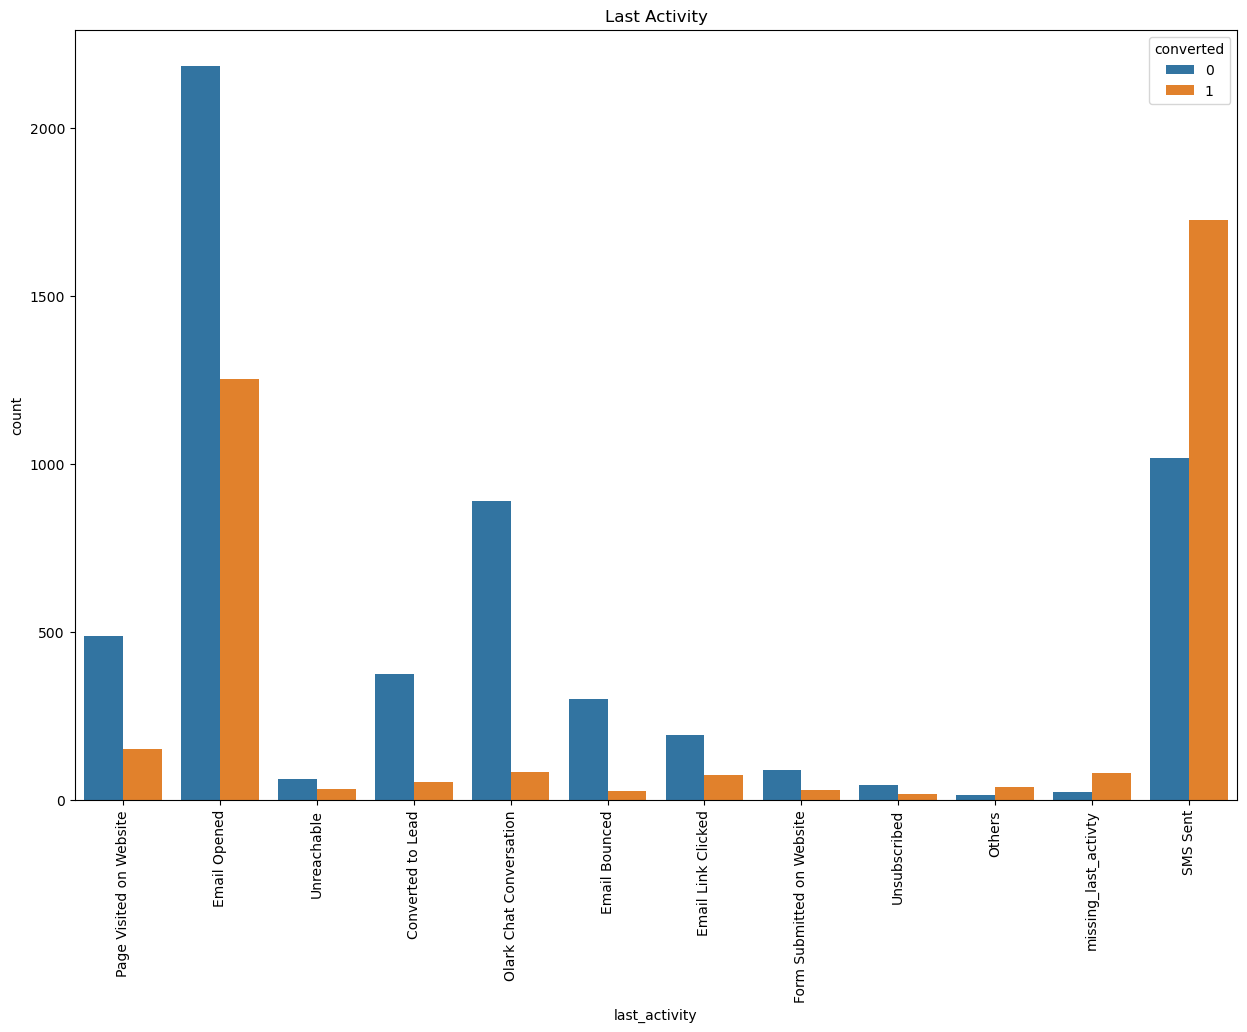

In [43]:
plt.figure(figsize=(15,10))
sns.countplot(x='last_activity', hue='converted', data = df)
plt.title('Last Activity')
plt.xticks(rotation=90)
plt.show()

By looking at the plot we can say that "Email Opened" and "SMS sent" have higher chances of coversion.

##### Variable 8: "lead_source"

In [44]:
#checking value counts of "last_activity" column
df.lead_source.value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: lead_source, dtype: int64

In [45]:
#replacing Nan Values and combining low frequency values
df.lead_source = df.lead_source.replace(np.nan,'Others')
df.lead_source = df.lead_source.replace(['bing','Click2call','Press_Release','Live Chat',
                                         'youtubechannel','testone','Pay per Click Ads',
                                         'welearnblog_Home','WeLearn','blog','NC_EDM'] ,'Others') 
df.lead_source = df.lead_source.replace('google','Google')
df.lead_source = df.lead_source.replace('Facebook','Social Media')

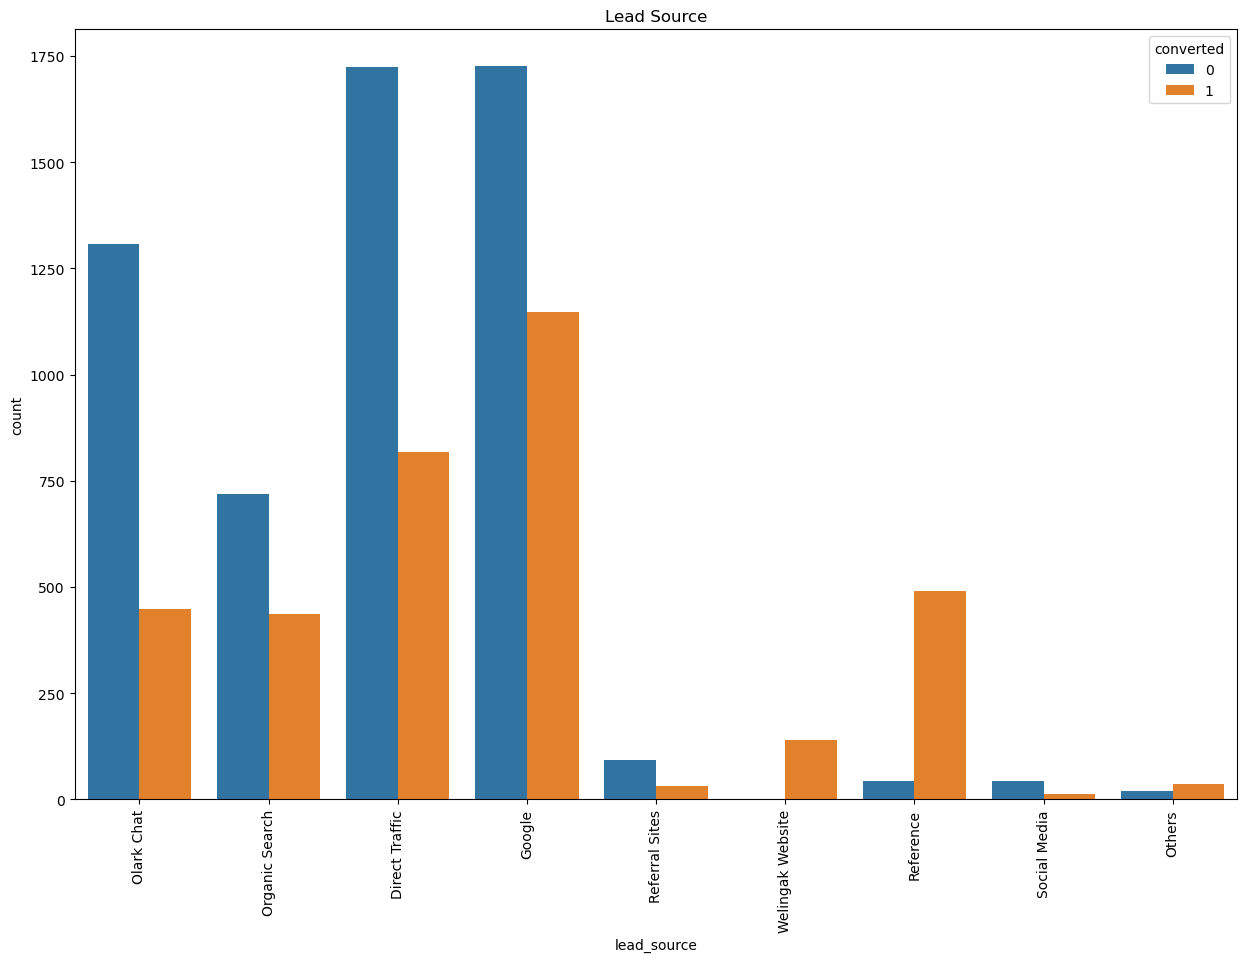

In [46]:
plt.figure(figsize=(15,10))
sns.countplot(x='lead_source', hue='converted', data = df)
plt.title('Lead Source')
plt.xticks(rotation=90)
plt.show()

We can observe that -
- Maximum number of leads are converted by "Google" and "Direct traffic".
- Conversion Rate of "Reference" and leads through "welingak website" is high.

In [47]:
#Checking the Null Values again
round(100*(df.isnull().sum()/len(df.index)).sort_values(ascending=False),2)

total_visits               1.48
page_views_per_visit       1.48
lead_origin                0.00
x_education_forums         0.00
mastering_interview        0.00
amount_through_cheque      0.00
city                       0.00
dm_content_updates         0.00
scm_content_updates        0.00
receive_courses_updates    0.00
through_recommendations    0.00
digital_advertisement      0.00
newspaper                  0.00
magazine                   0.00
newspaper_article          0.00
lead_source                0.00
search                     0.00
current_occupation         0.00
specialization             0.00
last_activity              0.00
time_on_website            0.00
converted                  0.00
do_not_call                0.00
do_not_email               0.00
last_notable_activity      0.00
dtype: float64

In [48]:
# Checking the percent of lose if the null values are removed
round(100*(sum(df.isnull().sum(axis=1) > 1)/df.shape[0]),2)

1.48

As, less than 1.5% of data is getting lost if we drop these rows, we can drop them as it will not affect the model performance.

In [49]:
#Dropping all rows which have Nan Values.
df = df.dropna()

In [50]:
#Final shape of data after dropping all null values
df.shape

(9103, 25)

#### 2.5 Treatment of Single Value Variables

In [51]:
# determine unique values for all object datatype columns
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 4
lead_source = 9
do_not_email = 2
do_not_call = 2
last_activity = 11
specialization = 11
current_occupation = 5
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
receive_courses_updates = 1
scm_content_updates = 1
dm_content_updates = 1
city = 7
amount_through_cheque = 1
mastering_interview = 2
last_notable_activity = 16


<u>There are few columns with just one value<u>- 
* magazine
* receive_courses_updates
* scm_content_updates
* dm_content_updates
* amount_through_cheque

They can be dropped as they are 100% imbalanced and skewed.

In [52]:
df.drop(columns=['magazine','receive_courses_updates','scm_content_updates',
                 'dm_content_updates','amount_through_cheque'], inplace=True)

#### 2.6 Treatment of BINARY Variables

Now, analysing variables with **BINARY VALUES** i.e. 2-Values.

In [53]:
#Creating DataFrame for Binary Variables
df_binary = df[['do_not_email', 'do_not_call', 'search', 'newspaper_article',
                'x_education_forums','newspaper','digital_advertisement','through_recommendations',
                'mastering_interview']]

In [54]:
# Let's see the value counts of each variable
for i in df_binary.columns:
    x = (df_binary[i].value_counts(normalize = True)) * 100
    print(x, end='\n\n')

No     92.046578
Yes     7.953422
Name: do_not_email, dtype: float64

No     99.978029
Yes     0.021971
Name: do_not_call, dtype: float64

No     99.846205
Yes     0.153795
Name: search, dtype: float64

No     99.978029
Yes     0.021971
Name: newspaper_article, dtype: float64

No     99.989015
Yes     0.010985
Name: x_education_forums, dtype: float64

No     99.989015
Yes     0.010985
Name: newspaper, dtype: float64

No     99.956058
Yes     0.043942
Name: digital_advertisement, dtype: float64

No     99.923102
Yes     0.076898
Name: through_recommendations, dtype: float64

No     68.274195
Yes    31.725805
Name: mastering_interview, dtype: float64



<u> Observing above data we can see high data imbalance in few variables. These are - 
- 'do_not_call'
- 'search'
- 'newspaper_article'
- 'x_education_forums'
- 'newspaper'
- 'digital_advertisement'
- 'through_recommendations'

So, we can drop these variables may they not provide useful information for the analysis or modeling tasks and may even negatively impact the performance of the model.

In [55]:
df_binary = df[['do_not_call', 'search', 'newspaper_article',
                'x_education_forums','newspaper','digital_advertisement','through_recommendations']]

df.drop(df_binary, axis = 1, inplace = True)

In [56]:
# determine unique values for all object datatype columns
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 4
lead_source = 9
do_not_email = 2
last_activity = 11
specialization = 11
current_occupation = 5
city = 7
mastering_interview = 2
last_notable_activity = 16


#### 2.7 Treatment of Categorical Variables with more levels

In [57]:
#checking value counts of 'last_notable_activity'
df.last_notable_activity.value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: last_notable_activity, dtype: int64

In [58]:
#clubbing lower frequency values

df.last_notable_activity = df.last_notable_activity.replace(['Had a Phone Conversation','Email Marked Spam',                                                                
                                                             'Approached upfront','Resubscribed to emails',
                                                             'View in browser link Clicked',
                                                             'Form Submitted on Website',
                                                             'Email Received'],'other_notable_activity')

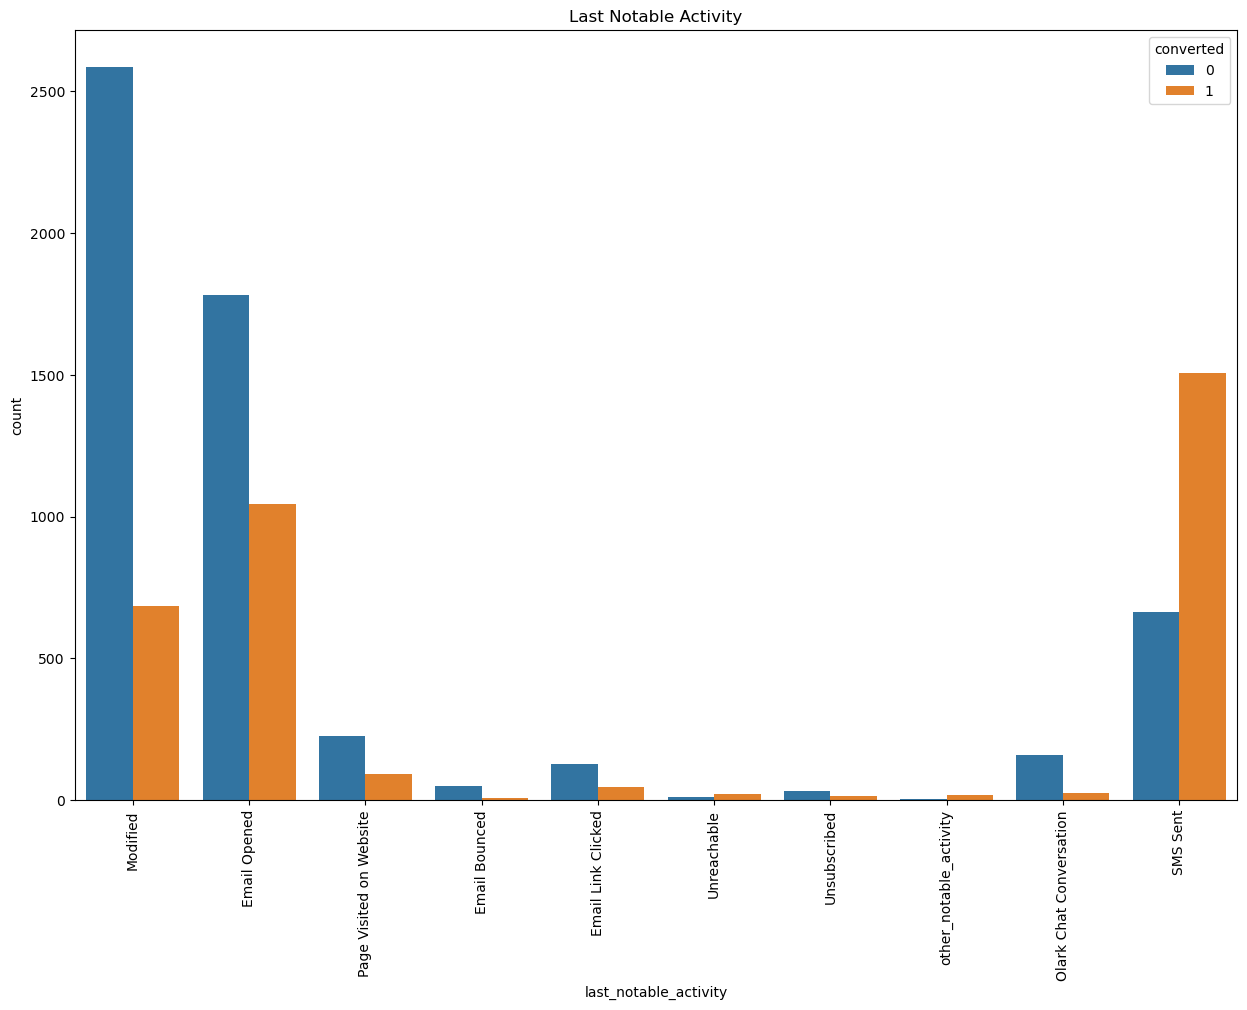

In [59]:
plt.figure(figsize=(15,10))
sns.countplot(x='last_notable_activity', hue='converted', data = df)
plt.title('Last Notable Activity')
plt.xticks(rotation=90)
plt.show()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lead_origin            9103 non-null   object 
 1   lead_source            9103 non-null   object 
 2   do_not_email           9103 non-null   object 
 3   converted              9103 non-null   int64  
 4   total_visits           9103 non-null   float64
 5   time_on_website        9103 non-null   int64  
 6   page_views_per_visit   9103 non-null   float64
 7   last_activity          9103 non-null   object 
 8   specialization         9103 non-null   object 
 9   current_occupation     9103 non-null   object 
 10  city                   9103 non-null   object 
 11  mastering_interview    9103 non-null   object 
 12  last_notable_activity  9103 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 995.6+ KB


In [61]:
df.TotalVisits = df.total_visits.astype('int')

#### 2.8  Analysing Numerical Variables

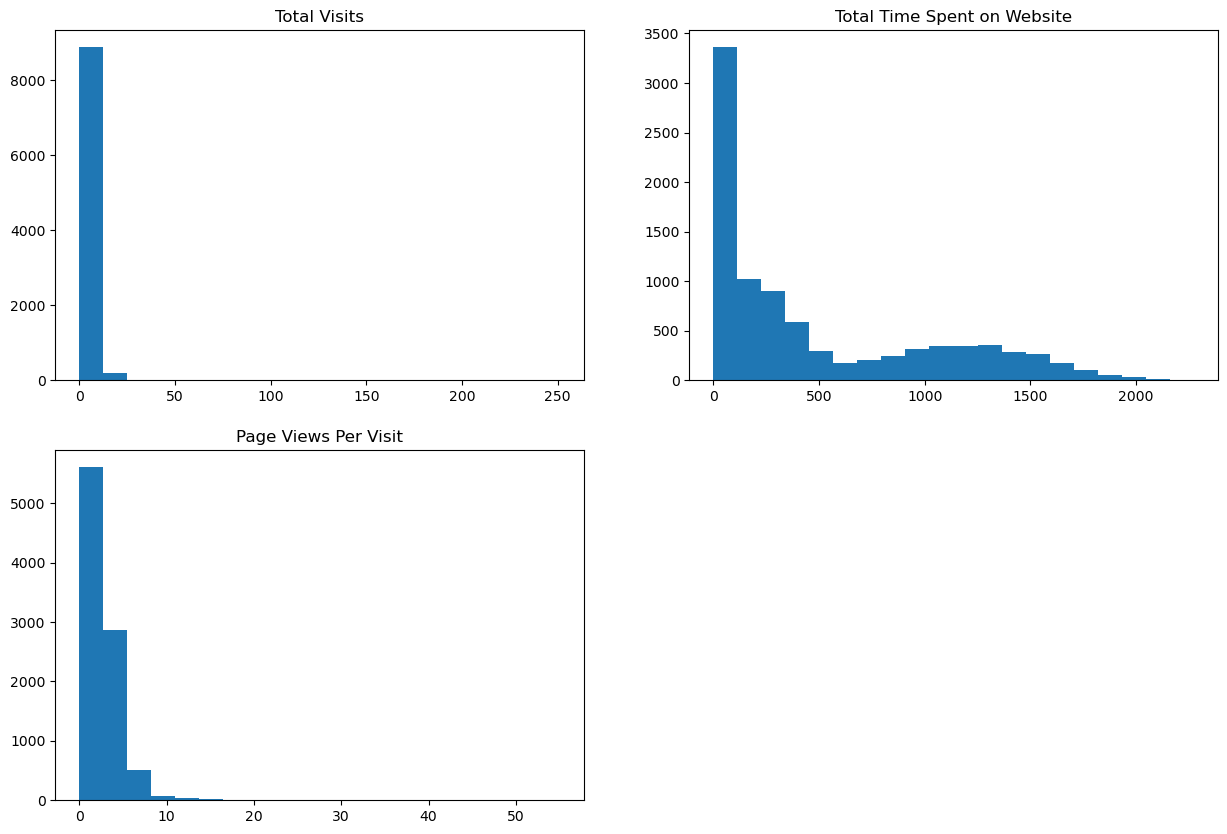

In [62]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
plt.hist(df.total_visits, bins = 20)
plt.title('Total Visits')

plt.subplot(2, 2, 2)
plt.hist(df.time_on_website, bins = 20)
plt.title('Total Time Spent on Website')

plt.subplot(2, 2, 3)
plt.hist(df.page_views_per_visit, bins = 20)
plt.title('Page Views Per Visit')

plt.show()

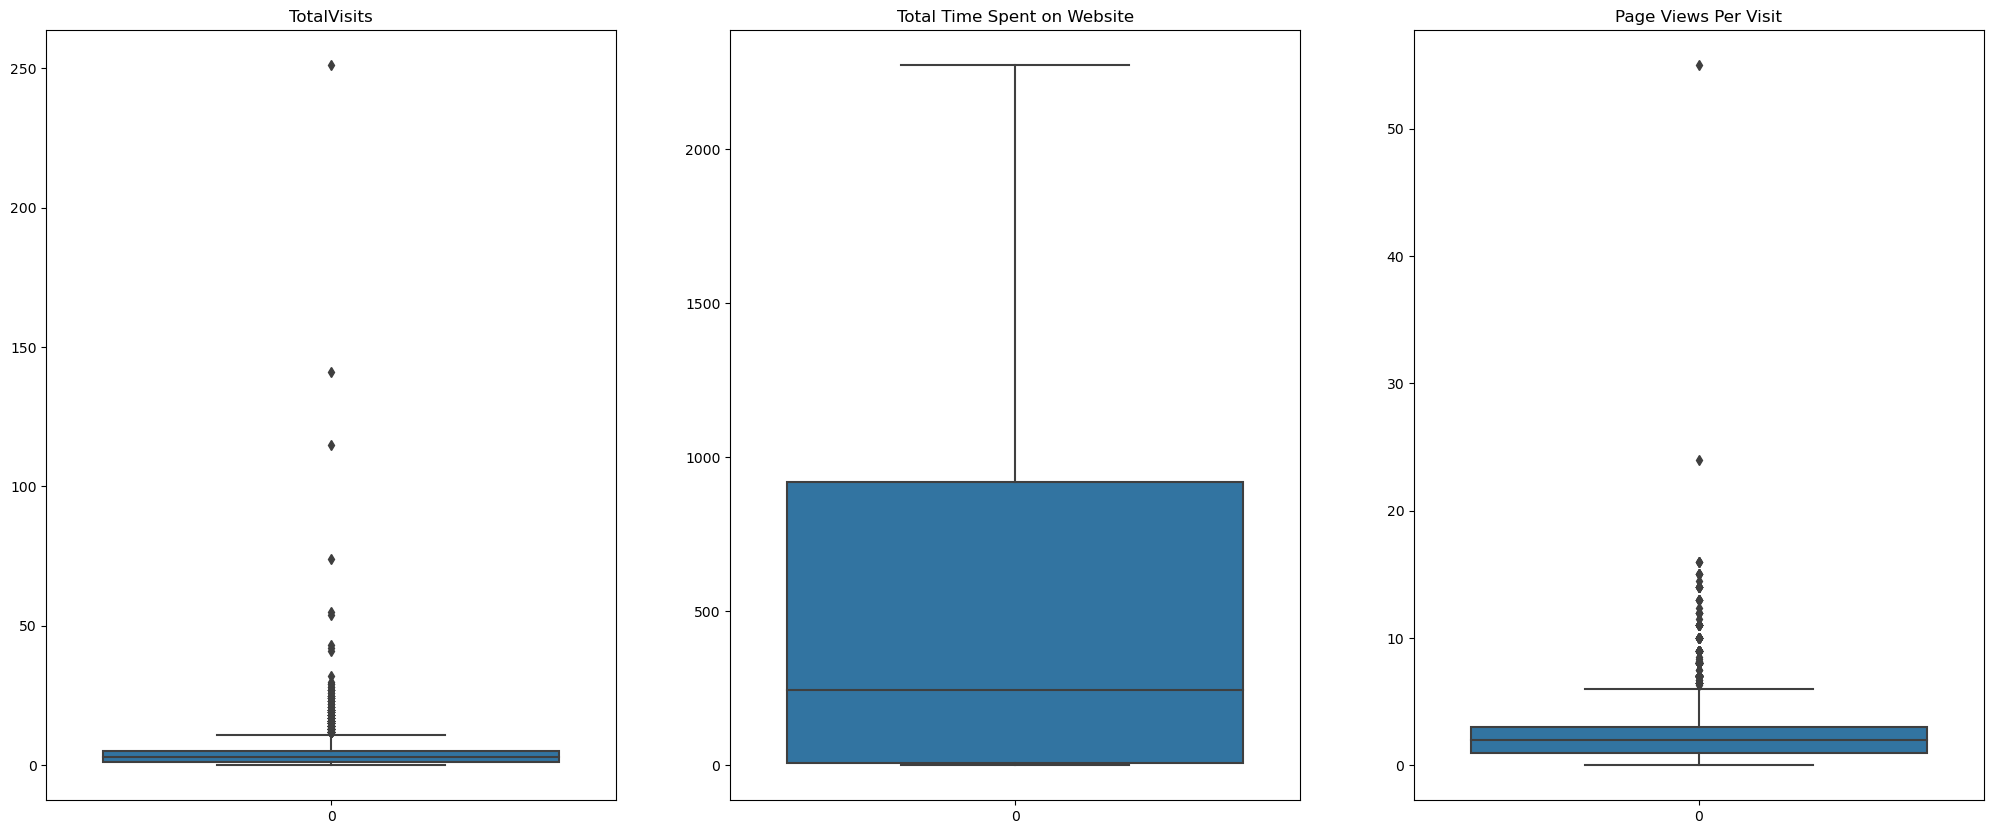

In [63]:
#Checking for Outlinears
plt.figure(figsize=(25, 10))

plt.subplot(1, 3, 1)
sns.boxplot(df.total_visits)
plt.title('TotalVisits')

plt.subplot(1, 3, 2)
sns.boxplot(df.time_on_website)
plt.title('Total Time Spent on Website')

plt.subplot(1, 3, 3)
sns.boxplot(df.page_views_per_visit)
plt.title('Page Views Per Visit')

plt.show()            

In [64]:
df.describe(percentiles=[.1,.25, .5, .75, .90, .95, .99])

converted  total_visits  time_on_website  page_views_per_visit
count  9103.000000   9103.000000      9103.000000           9103.000000
mean      0.380204      3.445238       481.350104              2.362820
std       0.485464      4.854853       545.066142              2.161418
min       0.000000      0.000000         0.000000              0.000000
10%       0.000000      0.000000         0.000000              0.000000
25%       0.000000      1.000000         9.000000              1.000000
50%       0.000000      3.000000       244.000000              2.000000
75%       1.000000      5.000000       919.500000              3.000000
90%       1.000000      7.000000      1372.000000              5.000000
95%       1.000000     10.000000      1556.900000              6.000000
99%       1.000000     17.000000      1838.960000              9.000000
max       1.000000    251.000000      2272.000000             55.000000

##### 2.8.1  Analysing Outliners in Numerical Variables

In [65]:
# Defining the upper limit as the 99th percentile of the variable-'TotalVisits' &'Page Views Per Visit'
upper_limit = df[['total_visits','page_views_per_visit']].quantile(0.99)
lower_limit = df[['total_visits','page_views_per_visit']].quantile(0.25)
print(upper_limit)
print()
print(lower_limit)

total_visits            17.0
page_views_per_visit     9.0
Name: 0.99, dtype: float64

total_visits            1.0
page_views_per_visit    1.0
Name: 0.25, dtype: float64


In [66]:
df = df[df.total_visits <= upper_limit[0]]
df = df[df.page_views_per_visit <= upper_limit[1]]

df = df[df.total_visits >= lower_limit[0]]
df = df[df.page_views_per_visit>= lower_limit[1]]

In [67]:
df = df.reset_index(drop=True)
df.index

RangeIndex(start=0, stop=6764, step=1)

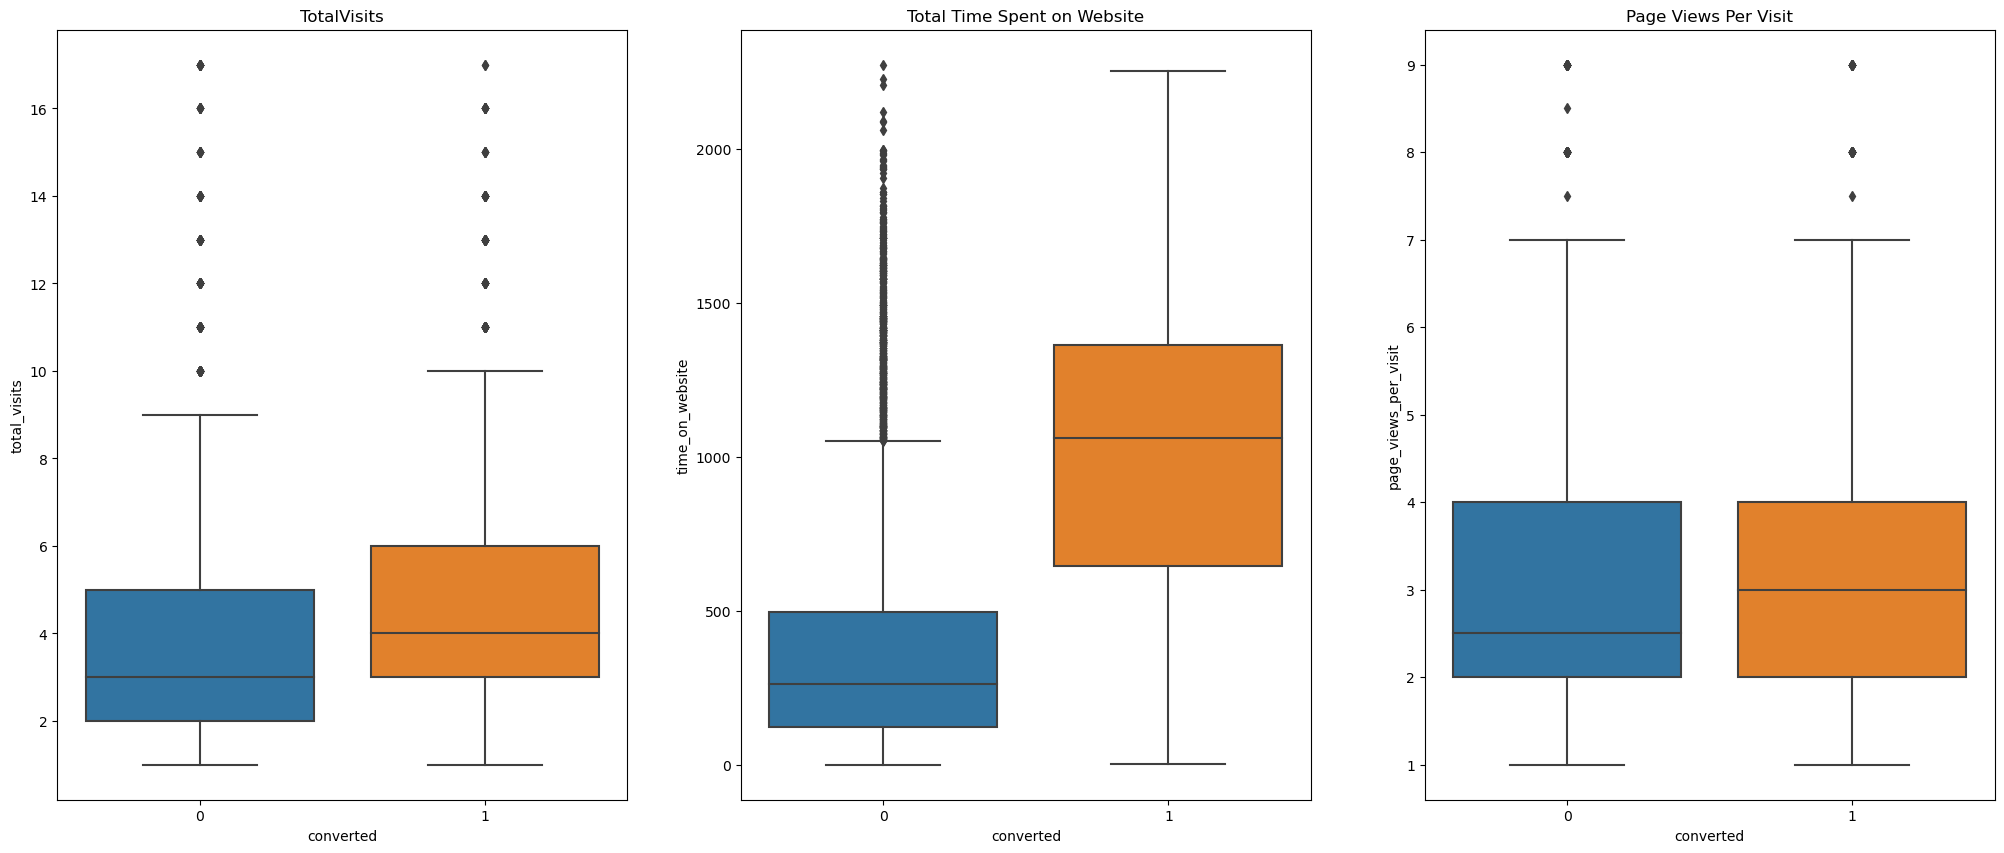

In [68]:
#Checking for Outlinears
plt.figure(figsize=(25, 10))

plt.subplot(1, 3, 1)
sns.boxplot(y=df.total_visits, x=df.converted)
plt.title('TotalVisits')

plt.subplot(1, 3, 2)
sns.boxplot(y=df.time_on_website, x=df.converted)
plt.title('Total Time Spent on Website')

plt.subplot(1, 3, 3)
sns.boxplot(y=df.page_views_per_visit, x=df.converted)
plt.title('Page Views Per Visit')

plt.show()

In [69]:
df.describe(percentiles=[.1,.25, .5, .75, .90, .95, .99])

converted  total_visits  time_on_website  page_views_per_visit
count  6764.000000   6764.000000      6764.000000           6764.000000
mean      0.366499      4.160260       632.343879              3.000470
std       0.481884      2.632284       542.404514              1.597793
min       0.000000      1.000000         0.000000              1.000000
10%       0.000000      2.000000        68.000000              1.250000
25%       0.000000      2.000000       170.000000              2.000000
50%       0.000000      4.000000       397.000000              2.670000
75%       1.000000      5.000000      1104.250000              4.000000
90%       1.000000      8.000000      1452.000000              5.000000
95%       1.000000      9.000000      1608.000000              6.000000
99%       1.000000     14.000000      1862.370000              8.000000
max       1.000000     17.000000      2272.000000              9.000000

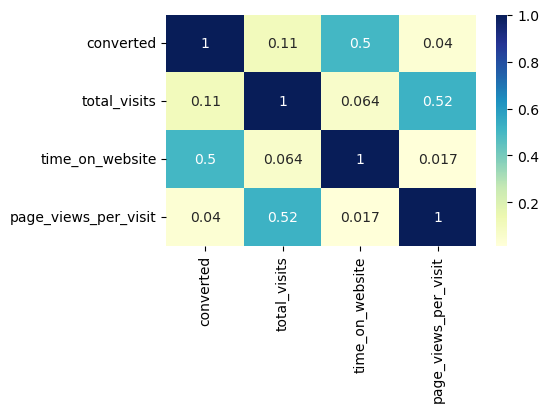

In [70]:
# Checking Correlation among numerical varibles
plt.figure(figsize=(5, 3))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

From Heatmap we can see that there is not very high correlation between them.

#### 2.9 Visualizing plots of Binary Categorical Variables & remaining categorical variable

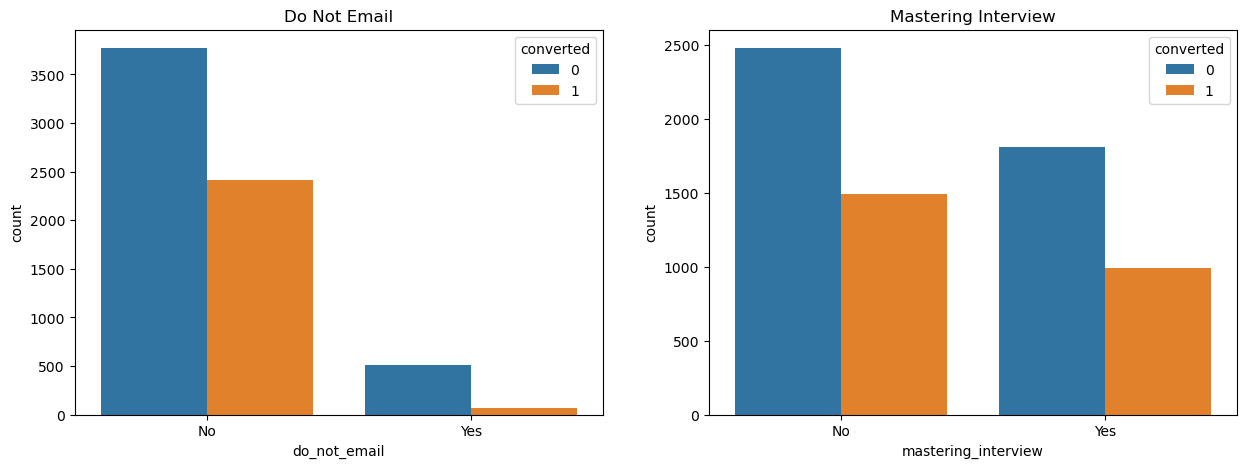

In [71]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.countplot(x='do_not_email', hue='converted', data = df)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='mastering_interview', hue='converted', data = df)
plt.title('Mastering Interview')
plt.show()

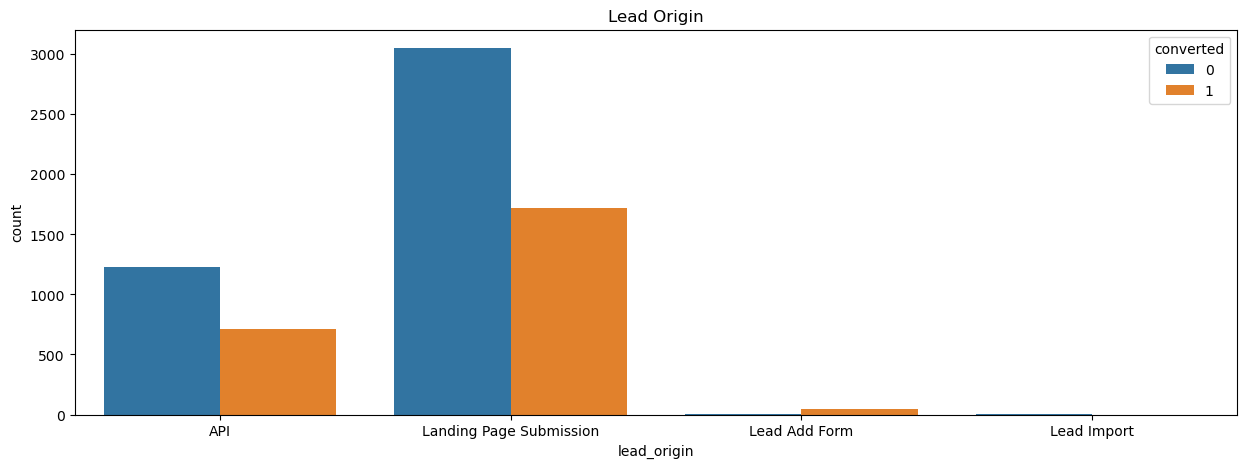

In [72]:
plt.figure(figsize=(15, 5))
sns.countplot(x='lead_origin', hue='converted', data = df)
plt.title('Lead Origin')
plt.show()

### Step 3: Data Preparation

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6764 entries, 0 to 6763
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lead_origin            6764 non-null   object 
 1   lead_source            6764 non-null   object 
 2   do_not_email           6764 non-null   object 
 3   converted              6764 non-null   int64  
 4   total_visits           6764 non-null   float64
 5   time_on_website        6764 non-null   int64  
 6   page_views_per_visit   6764 non-null   float64
 7   last_activity          6764 non-null   object 
 8   specialization         6764 non-null   object 
 9   current_occupation     6764 non-null   object 
 10  city                   6764 non-null   object 
 11  mastering_interview    6764 non-null   object 
 12  last_notable_activity  6764 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 687.1+ KB


In [74]:
#Categorical Variables List
cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['lead_origin', 'lead_source', 'do_not_email', 'last_activity',
       'specialization', 'current_occupation', 'city', 'mastering_interview',
       'last_notable_activity'],
      dtype='object')

#### 3.1 Mapping Binary Variable with 'yes' and 'no' with 1 & 0.

In [75]:
# List of variables to map
varlist =  ['do_not_email', 'mastering_interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

#### 3.2 Creating dummy variable for other categorical columns

In [76]:
# Creating a dummy variable for categorical variables and dropping the first one.
dummy = pd.get_dummies(df[['lead_origin', 'lead_source', 'last_activity',
                            'specialization', 'current_occupation', 'city',
                            'last_notable_activity']], drop_first = True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [77]:
# Dropping the columns for which dummies have been created
df.drop(['lead_origin', 'lead_source', 'last_activity',
         'specialization', 'current_occupation', 'city',
         'last_notable_activity'], axis = 1, inplace = True)

df.head()

do_not_email  converted  total_visits  time_on_website  \
0             0          0           5.0              674   
1             0          1           2.0             1532   
2             0          0           1.0              305   
3             0          1           2.0             1428   
4             0          1           2.0             1640   

   page_views_per_visit  mastering_interview  \
0                   2.5                    0   
1                   2.0                    1   
2                   1.0                    0   
3                   1.0                    0   
4                   2.0                    0   

   lead_origin_Landing Page Submission  lead_origin_Lead Add Form  \
0                                    0                          0   
1                                    1                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   lead_origin_Lead Import  lead_source_Google  lead_source_Olark Chat  \
0                        0                   0                       0   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   1                       0   
4                        0                   1                       0   

   lead_source_Organic Search  lead_source_Others  lead_source_Reference  \
0                           1                   0                      0   
1                           0                   0                      0   
2                           0                   0                      0   
3                           0                   0                      0   
4                           0                   0                      0   

   lead_source_Referral Sites  lead_source_Social Media  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   lead_source_Welingak Website  last_activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   last_activity_Email Link Clicked  last_activity_Email Opened  ...  \
0                                 0                           1  ...   
1                                 0                           1  ...   
2                                 0                           0  ...   
3                                 0                           0  ...   
4                                 0                           1  ...   

   specialization_missing_specialization  current_occupation_Student  \
0                                      1                           0   
1                                      0                           1   
2                                      0                           0   
3                                      1                           0   
4                                      0                           0   

   current_occupation_Unemployed  current_occupation_Working Professional  \
0                              1                                        0   
1                              0                                        0   
2                              1                                        0   
3                              1                                        0   
4                              1       

### Step 4: Test-Train Split

In [78]:
from sklearn.model_selection import train_test_split
# Putting feature variables to X
X = df.drop(['converted'], axis=1)
X.head()

do_not_email  total_visits  time_on_website  page_views_per_visit  \
0             0           5.0              674                   2.5   
1             0           2.0             1532                   2.0   
2             0           1.0              305                   1.0   
3             0           2.0             1428                   1.0   
4             0           2.0             1640                   2.0   

   mastering_interview  lead_origin_Landing Page Submission  \
0                    0                                    0   
1                    1                                    1   
2                    0                                    1   
3                    0                                    1   
4                    0                                    1   

   lead_origin_Lead Add Form  lead_origin_Lead Import  lead_source_Google  \
0                          0                        0                   0   
1                          0                        0                   0   
2                          0                        0                   0   
3                          0                        0                   1   
4                          0                        0                   1   

   lead_source_Olark Chat  lead_source_Organic Search  lead_source_Others  \
0                       0                           1                   0   
1                       0                           0                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   lead_source_Reference  lead_source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   lead_source_Social Media  lead_source_Welingak Website  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             0   
4                         0                             0   

   last_activity_Email Bounced  last_activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   last_activity_Email Opened  last_activity_Form Submitted on Website  ...  \
0                           1                                        0  ...   
1                           1                                        0  ...   
2                           0                                        0  ...   
3                           0                                        0  ...   
4                           1                                        0  ...   

   specialization_missing_specialization  current_occupation_Student  \
0                                      1                           0   
1                                      0                           1   
2                                      0                           0   
3                                      1                           0   
4                                      0                           0   

   current_occupation_Unemployed  current_occupation_Working Professional  \
0                              1                                        0   
1                              0                                        0   
2            

In [79]:
# Putting response variable to y
y = df['converted']
y.head()

0    0
1    1
2    0
3    1
4    1
Name: converted, dtype: int64

In [80]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.70,test_size=0.30, random_state=42)

### Step 5: Feature Scaling

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()

X_train[['total_visits','time_on_website','page_views_per_visit']] =scaler.fit_transform(
    X_train[['total_visits','time_on_website','page_views_per_visit']])

X_train.head()

do_not_email  total_visits  time_on_website  page_views_per_visit  \
3187             0     -1.194414        -0.863920             -1.251762   
2251             0     -0.441404        -1.142926              0.000196   
438              0     -0.064898        -0.557380              0.626175   
627              0      0.688112         0.263118              0.000196   
339              0     -0.441404        -1.049312              0.000196   

      mastering_interview  lead_origin_Landing Page Submission  \
3187                    1                                    1   
2251                    0                                    0   
438                     0                                    1   
627                     0                                    1   
339                     0                                    0   

      lead_origin_Lead Add Form  lead_origin_Lead Import  lead_source_Google  \
3187                          0                        0                   0   
2251                          0                        0                   1   
438                           0                        0                   1   
627                           0                        0                   1   
339                           0                        0                   0   

      lead_source_Olark Chat  lead_source_Organic Search  lead_source_Others  \
3187                       0                           0                   0   
2251                       0                           0                   0   
438                        0                           0                   0   
627                        0                           0                   0   
339                        0                           0                   0   

      lead_source_Reference  lead_source_Referral Sites  \
3187                      0                           0   
2251                      0                           0   
438                       0                           0   
627                       0                           0   
339                       0                           1   

      lead_source_Social Media  lead_source_Welingak Website  \
3187                         0                             0   
2251                         0                             0   
438                          0                             0   
627                          0                             0   
339                          0                             0   

      last_activity_Email Bounced  last_activity_Email Link Clicked  \
3187                            0                                 0   
2251                            0                                 0   
438                             0                                 0   
627                             0                                 0   
339                             0                                 0   

      last_activity_Email Opened  last_activity_Form Submitted on Website  \
3187                           0                                        0   
2251                           0                                        0   
438                            1                                        0   
627                            1                                        0   
339                            1                                        0   

      ...  specialization_missing_specialization  current_occupation_Student  \
3187  ...                                      0                           0   
2251  ...                                      1                           0   
438   ...                                      0                           0   
627   ...                                      0                           0   
339   ...                                      1                           0   

      current_occupation_Unemployed  current_occupation_Working Professional  \
3187 

In [83]:
# checking the conversion rate
conversion_perc = round((sum(df['converted'])/len(df['converted'].index))*100,2)
print(conversion_perc, "%")

36.65 %


### Step 6: Looking at Correlations

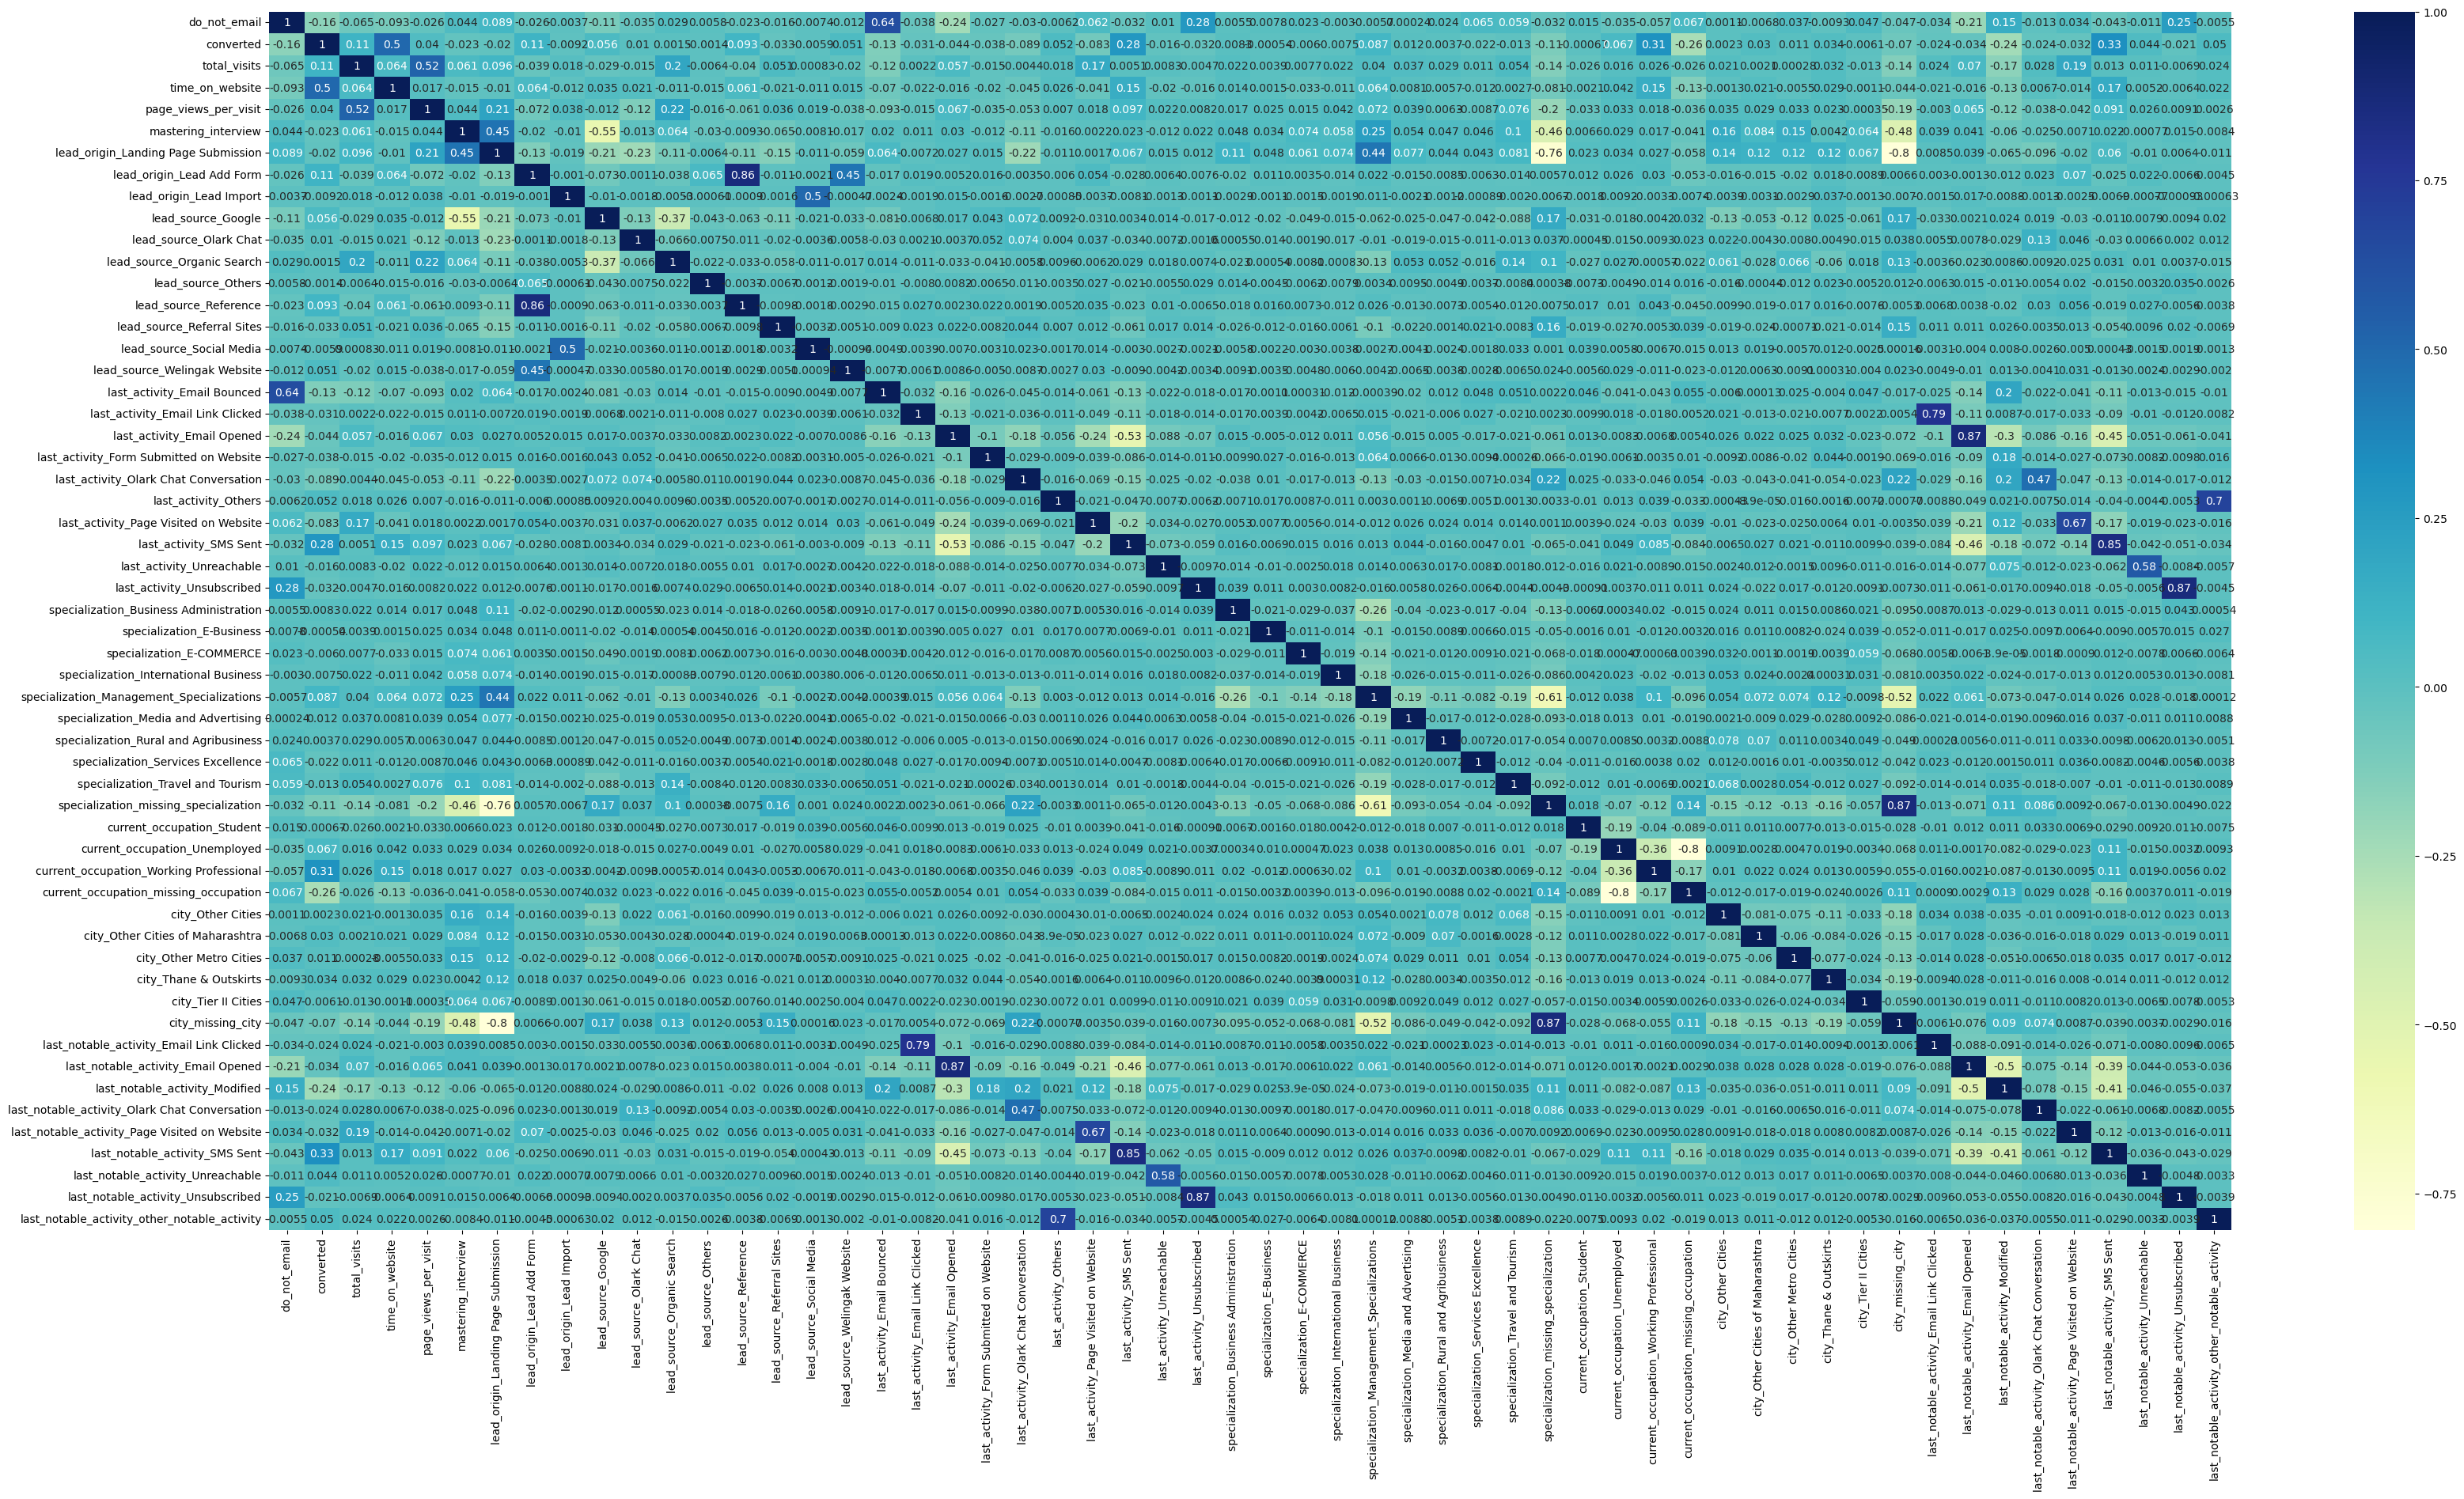

In [84]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,20))       
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [85]:
#Dropping highly correlated variables both from train dataset.
X_train=X_train.drop(['lead_origin_Lead Add Form',
                      'last_notable_activity_SMS Sent',
                      'last_notable_activity_Email Link Clicked',
                      'last_notable_activity_Email Opened',
                      'last_notable_activity_Unsubscribed',
                      'last_notable_activity_Olark Chat Conversation',
                      'last_notable_activity_Unreachable',
                      'specialization_missing_specialization',
                      'city_missing_city',
                      'current_occupation_missing_occupation'], axis = 1)

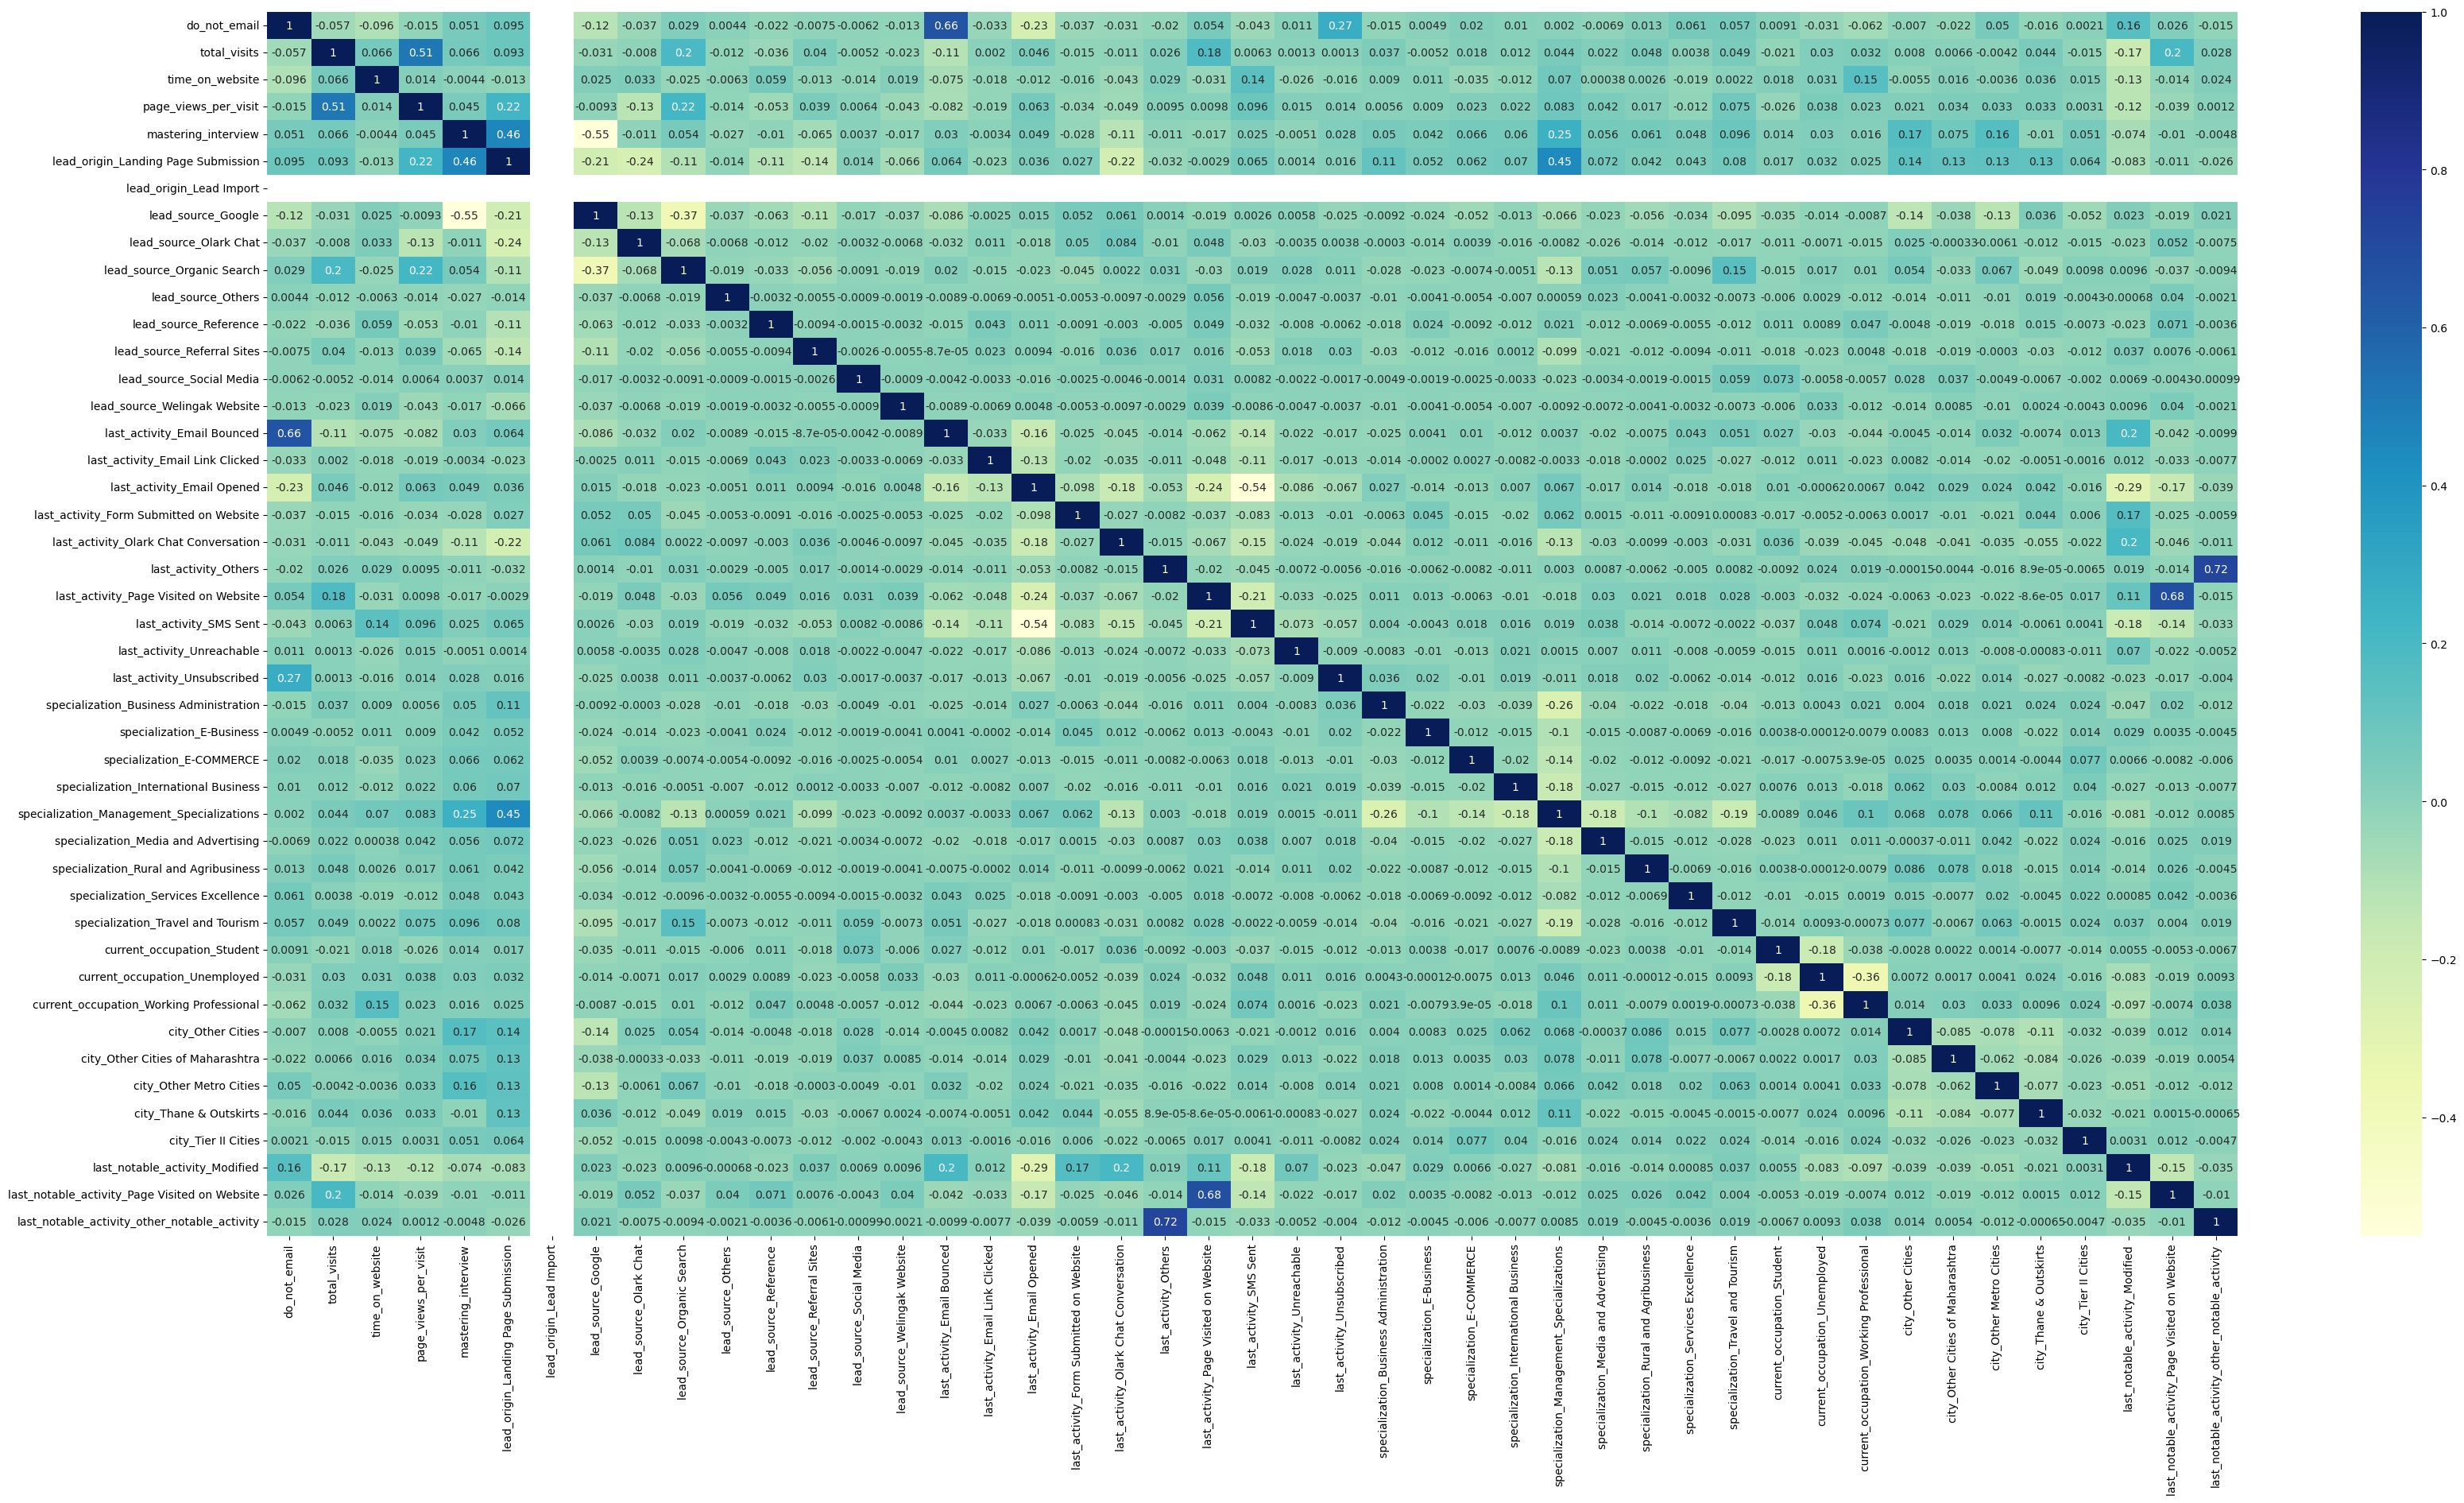

In [86]:
## lets again check the correlation matrix
plt.figure(figsize = (40,20))       
sns.heatmap(X_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [87]:
#Dropping highly correlated variables both from train dataset.
X_train=X_train.drop(['last_activity_Email Bounced',
                      'last_notable_activity_Page Visited on Website',
                      'last_activity_Others',
                      'lead_origin_Lead Import'], axis = 1)

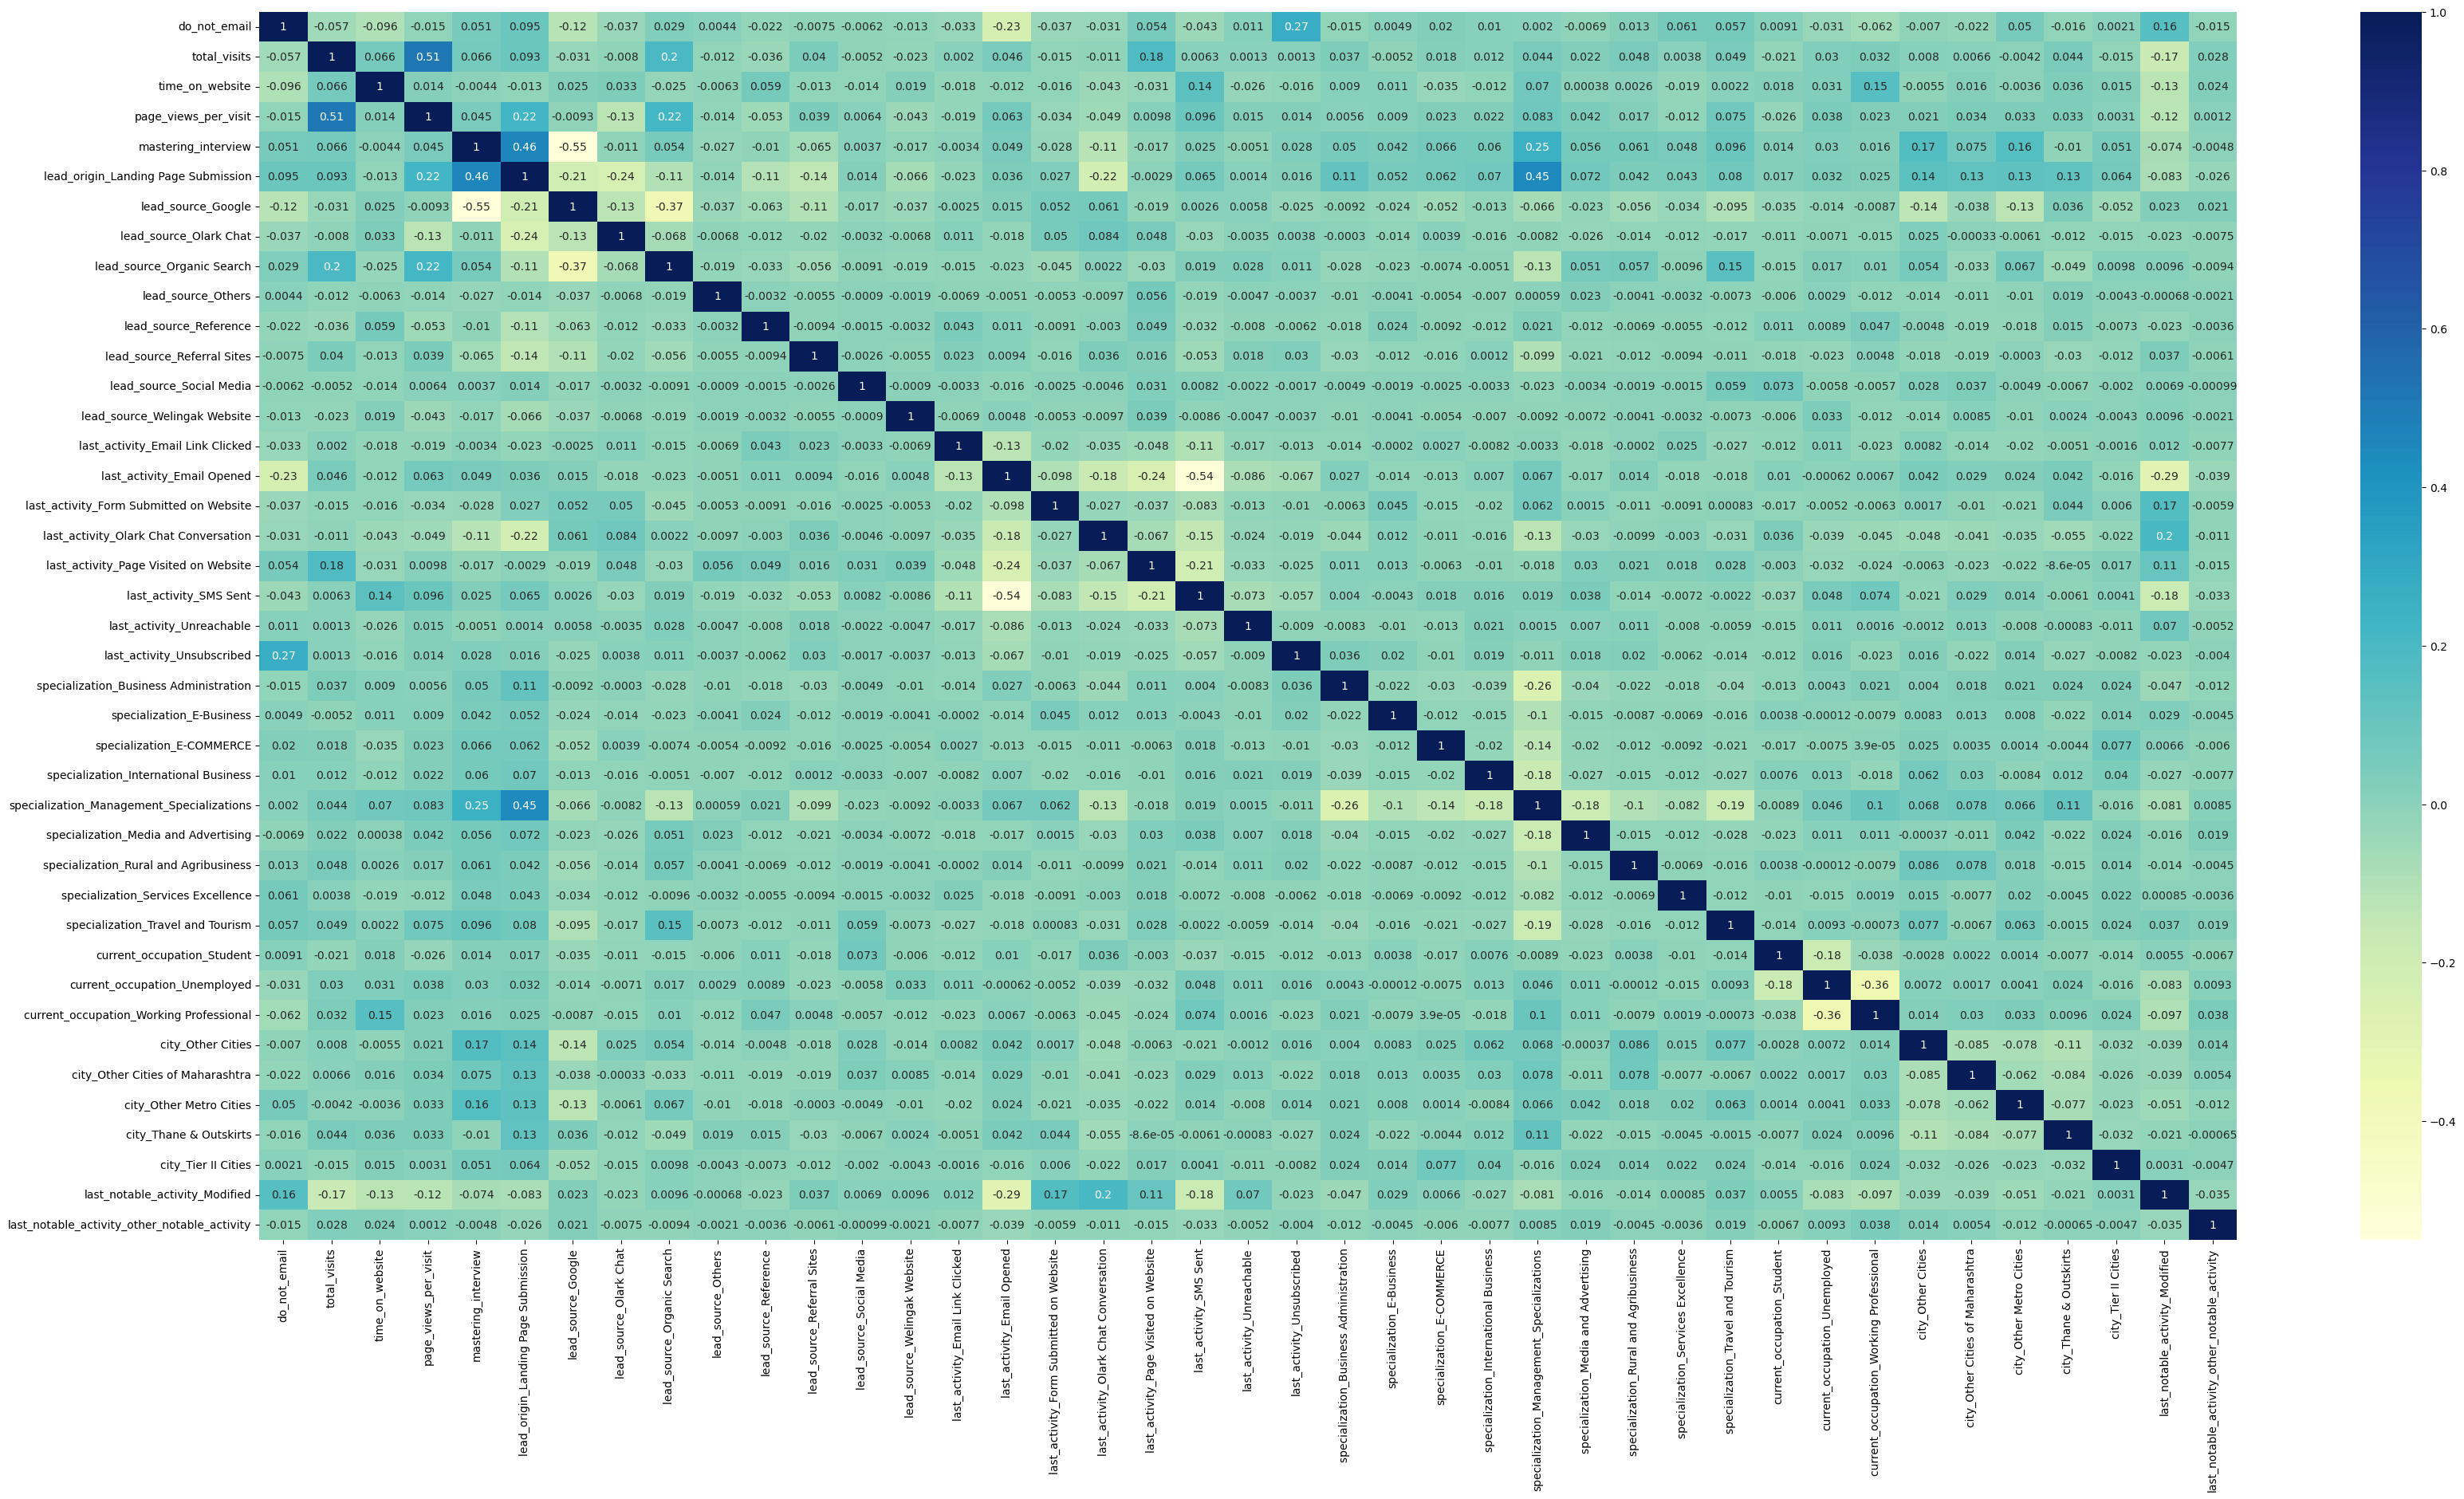

In [88]:
## lets again check the correlation matrix
plt.figure(figsize = (40,20))       
sns.heatmap(X_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

### Step 7: Model Building

In [89]:
# Checking variable count before starting to build a model.
X_train.shape

(4734, 41)

#### 7.1 Buildiing Model with All variables

In [90]:
# Running First Training Model
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4734
Model:                            GLM   Df Residuals:                     4692
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1940.7
Date:                Tue, 28 Feb 2023   Deviance:                       3881.4
Time:                        09:41:31   Pearson chi2:                 4.64e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3900
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.2274      0.266     -8.368      0.000      -2.749      -1.706
do_not_email                                    -1.4554      0.235     -6.185      0.000      -1.917      -0.994
total_visits                                     0.2511      0.048      5.252      0.000       0.157       0.345
time_on_website                                  1.1591      0.043     27.111      0.000       1.075       1.243
page_views_per_visit                            -0.1158      0.049     -2.352      0.019      -0.212      -0.019
mastering_interview                             -0.0659      0.113     -0.583      0.560      -0.287       0.156
lead_origin_Landing Page Submission             -0.5710      0.141     -4.041      0.000      -0.848      -0.294
lead_source_Google                               0.1480      0.118      1.250      0.211      -0.084       0.380
lead_source_Olark Chat                          -0.5076      0.284     -1.786      0.074      -1.065       0.049
lead_source_Organic Search                       0.0438      0.137      0.321      0.749      -0.224       0.312
lead_source_Others                               1.2372      0.827      1.496      0.135      -0.384       2.858
lead_source_Reference                            3.9253      1.134      3.462      0.001       1.703       6.148
lead_source_Referral Sites                      -0.1773      0.368     -0.481      0.630      -0.899       0.545
lead_source_Social Media                       -21.3632   3.01e+04     -0.001      0.999    -5.9e+04     5.9e+04
lead_source_Welingak Website                    22.9683   1.46e+04      0.002      0.999   -2.85e+04    2.86e+04
last_activity_Email Link Clicked                 0.3729      0.329      1.133      0.257      -0.272       1.018
last_activity_Email Opened                       0.4802      0.217      2.216      0.027       0.056       0.905
last_activity_Form Submitted on Website          0.1306      0.422      0.309      0.757      -0.697       0.958
last_activity_Olark Chat Conversation            0.1017      0.292      0.348      0.728      -0.471       0.675
last_activity_Page Visited on Website            0.2681      0.252      1.065      0.287      -0.225       0.761
last_activity_SMS Sent                           1.6776      0.214      7.832      0.000       1.258       2.097
last_activity_Unreachable                        0.9922      0.414      2.394      0.017       0.180       1.804
last_activity_Unsubscribed                       1.4316      0.593      2.415      0.016       0.270       2.593
specialization_Business Administration           0.1397      0.216      0.648      0.517      -0.283       0.562
specialization_E-Business       

### Step 8: Feature Selection Using RFE

In [91]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [92]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [93]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('do_not_email', True, 1),
 ('total_visits', False, 12),
 ('time_on_website', True, 1),
 ('page_views_per_visit', False, 21),
 ('mastering_interview', False, 23),
 ('lead_origin_Landing Page Submission', False, 3),
 ('lead_source_Google', False, 19),
 ('lead_source_Olark Chat', False, 2),
 ('lead_source_Organic Search', False, 26),
 ('lead_source_Others', True, 1),
 ('lead_source_Reference', True, 1),
 ('lead_source_Referral Sites', False, 8),
 ('lead_source_Social Media', True, 1),
 ('lead_source_Welingak Website', True, 1),
 ('last_activity_Email Link Clicked', False, 16),
 ('last_activity_Email Opened', False, 11),
 ('last_activity_Form Submitted on Website', False, 27),
 ('last_activity_Olark Chat Conversation', False, 24),
 ('last_activity_Page Visited on Website', False, 17),
 ('last_activity_SMS Sent', True, 1),
 ('last_activity_Unreachable', True, 1),
 ('last_activity_Unsubscribed', True, 1),
 ('specialization_Business Administration', False, 22),
 ('specialization_E-Business'

In [94]:
col = X_train.columns[rfe.support_]
col

Index(['do_not_email', 'time_on_website', 'lead_source_Others',
       'lead_source_Reference', 'lead_source_Social Media',
       'lead_source_Welingak Website', 'last_activity_SMS Sent',
       'last_activity_Unreachable', 'last_activity_Unsubscribed',
       'specialization_E-Business', 'current_occupation_Student',
       'current_occupation_Unemployed',
       'current_occupation_Working Professional',
       'last_notable_activity_Modified',
       'last_notable_activity_other_notable_activity'],
      dtype='object')

In [95]:
X_train.columns[~rfe.support_]

Index(['total_visits', 'page_views_per_visit', 'mastering_interview',
       'lead_origin_Landing Page Submission', 'lead_source_Google',
       'lead_source_Olark Chat', 'lead_source_Organic Search',
       'lead_source_Referral Sites', 'last_activity_Email Link Clicked',
       'last_activity_Email Opened', 'last_activity_Form Submitted on Website',
       'last_activity_Olark Chat Conversation',
       'last_activity_Page Visited on Website',
       'specialization_Business Administration', 'specialization_E-COMMERCE',
       'specialization_International Business',
       'specialization_Management_Specializations',
       'specialization_Media and Advertising',
       'specialization_Rural and Agribusiness',
       'specialization_Services Excellence',
       'specialization_Travel and Tourism', 'city_Other Cities',
       'city_Other Cities of Maharashtra', 'city_Other Metro Cities',
       'city_Thane & Outskirts', 'city_Tier II Cities'],
      dtype='object')

##### Assessing the model with StatsModels

In [96]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4734
Model:                            GLM   Df Residuals:                     4718
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1978.2
Date:                Tue, 28 Feb 2023   Deviance:                       3956.4
Time:                        09:41:32   Pearson chi2:                 4.70e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3802
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.7984      0.102    -17.552      0.000      -1.999      -1.598
do_not_email                                    -1.6865      0.224     -7.535      0.000      -2.125      -1.248
time_on_website                                  1.1698      0.042     27.696      0.000       1.087       1.253
lead_source_Others                               1.2122      0.811      1.495      0.135      -0.377       2.801
lead_source_Reference                            4.1950      1.137      3.689      0.000       1.966       6.424
lead_source_Social Media                       -21.6189   3.02e+04     -0.001      0.999   -5.93e+04    5.93e+04
lead_source_Welingak Website                    23.1002   1.48e+04      0.002      0.999    -2.9e+04     2.9e+04
last_activity_SMS Sent                           1.2083      0.085     14.290      0.000       1.043       1.374
last_activity_Unreachable                        0.6467      0.372      1.737      0.082      -0.083       1.376
last_activity_Unsubscribed                       1.0940      0.573      1.909      0.056      -0.029       2.217
specialization_E-Business                        0.3405      0.412      0.827      0.409      -0.467       1.148
current_occupation_Student                       1.0178      0.295      3.445      0.001       0.439       1.597
current_occupation_Unemployed                    1.0693      0.101     10.636      0.000       0.872       1.266
current_occupation_Working Professional          3.8196      0.232     16.464      0.000       3.365       4.274
last_notable_activity_Modified                  -0.7421      0.091     -8.150      0.000      -0.921      -0.564
last_notable_activity_other_notable_activity     2.7529      1.145      2.404      0.016       0.509       4.997
================================================================================================================
"""

#### Checking VIF values

In [97]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11                 current_occupation_Unemployed  1.58
6                         last_activity_SMS Sent  1.39
13                last_notable_activity_Modified  1.34
0                                   do_not_email  1.21
8                     last_activity_Unsubscribed  1.10
12       current_occupation_Working Professional  1.10
1                                time_on_website  1.06
7                      last_activity_Unreachable  1.02
10                    current_occupation_Student  1.02
3                          lead_source_Reference  1.01
4                       lead_source_Social Media  1.01
9                      specialization_E-Business  1.01
14  last_notable_activity_other_notable_activity  1.01
2                             lead_source_Others  1.00
5                   lead_source_Welingak Website  1.00

In [99]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3187    0.077145
2251    0.103260
438     0.200826
627     0.240464
339     0.063053
4377    0.559034
1744    0.871219
925     0.057651
6139    0.941357
295     0.048797
dtype: float64

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [100]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Cust_ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Cust_ID
3187          0        0.077145     3187
2251          0        0.103260     2251
438           0        0.200826      438
627           0        0.240464      627
339           0        0.063053      339

##### Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0

In [101]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  Cust_ID  Predicted
3187          0        0.077145     3187          0
2251          0        0.103260     2251          0
438           0        0.200826      438          0
627           0        0.240464      627          0
339           0        0.063053      339          0

In [102]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2648  351]
 [ 564 1171]]


In [103]:
# Let's check the overall accuracy.
round(100*(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)),2)

80.67

### Step 9: Manual Feature elimination

In [104]:
col = col.drop('lead_source_Welingak Website', 1)
col

Index(['do_not_email', 'time_on_website', 'lead_source_Others',
       'lead_source_Reference', 'lead_source_Social Media',
       'last_activity_SMS Sent', 'last_activity_Unreachable',
       'last_activity_Unsubscribed', 'specialization_E-Business',
       'current_occupation_Student', 'current_occupation_Unemployed',
       'current_occupation_Working Professional',
       'last_notable_activity_Modified',
       'last_notable_activity_other_notable_activity'],
      dtype='object')

In [105]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4734
Model:                            GLM   Df Residuals:                     4719
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1986.7
Date:                Tue, 28 Feb 2023   Deviance:                       3973.5
Time:                        09:41:32   Pearson chi2:                 4.70e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3780
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.7991      0.102    -17.571      0.000      -2.000      -1.598
do_not_email                                    -1.6950      0.224     -7.577      0.000      -2.133      -1.257
time_on_website                                  1.1703      0.042     27.735      0.000       1.088       1.253
lead_source_Others                               1.2040      0.811      1.485      0.137      -0.385       2.793
lead_source_Reference                            4.1807      1.137      3.675      0.000       1.951       6.410
lead_source_Social Media                       -20.6174   1.84e+04     -0.001      0.999    -3.6e+04     3.6e+04
last_activity_SMS Sent                           1.2021      0.084     14.243      0.000       1.037       1.368
last_activity_Unreachable                        0.6322      0.372      1.700      0.089      -0.097       1.361
last_activity_Unsubscribed                       1.0919      0.573      1.905      0.057      -0.032       2.215
specialization_E-Business                        0.3327      0.412      0.808      0.419      -0.474       1.139
current_occupation_Student                       1.0173      0.295      3.445      0.001       0.439       1.596
current_occupation_Unemployed                    1.0809      0.100     10.761      0.000       0.884       1.278
current_occupation_Working Professional          3.8189      0.232     16.467      0.000       3.364       4.273
last_notable_activity_Modified                  -0.7312      0.091     -8.065      0.000      -0.909      -0.554
last_notable_activity_other_notable_activity     2.7424      1.145      2.395      0.017       0.498       4.986
================================================================================================================
"""

In [106]:
#Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10                 current_occupation_Unemployed  1.58
5                         last_activity_SMS Sent  1.39
12                last_notable_activity_Modified  1.34
0                                   do_not_email  1.21
7                     last_activity_Unsubscribed  1.10
11       current_occupation_Working Professional  1.10
1                                time_on_website  1.06
6                      last_activity_Unreachable  1.02
9                     current_occupation_Student  1.02
3                          lead_source_Reference  1.01
4                       lead_source_Social Media  1.01
8                      specialization_E-Business  1.01
13  last_notable_activity_other_notable_activity  1.01
2                             lead_source_Others  1.00

##### Dropping variable with high p-values(>0.05) one by one and see change in p-values and vif.

In [107]:
col = col.drop('lead_source_Social Media', 1)
col

Index(['do_not_email', 'time_on_website', 'lead_source_Others',
       'lead_source_Reference', 'last_activity_SMS Sent',
       'last_activity_Unreachable', 'last_activity_Unsubscribed',
       'specialization_E-Business', 'current_occupation_Student',
       'current_occupation_Unemployed',
       'current_occupation_Working Professional',
       'last_notable_activity_Modified',
       'last_notable_activity_other_notable_activity'],
      dtype='object')

In [108]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4734
Model:                            GLM   Df Residuals:                     4720
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1987.4
Date:                Tue, 28 Feb 2023   Deviance:                       3974.9
Time:                        09:41:33   Pearson chi2:                 4.70e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3778
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.7986      0.102    -17.567      0.000      -1.999      -1.598
do_not_email                                    -1.6937      0.224     -7.570      0.000      -2.132      -1.255
time_on_website                                  1.1710      0.042     27.751      0.000       1.088       1.254
lead_source_Others                               1.2038      0.811      1.485      0.138      -0.385       2.793
lead_source_Reference                            4.1809      1.137      3.676      0.000       1.952       6.410
last_activity_SMS Sent                           1.1999      0.084     14.225      0.000       1.035       1.365
last_activity_Unreachable                        0.6317      0.372      1.699      0.089      -0.097       1.361
last_activity_Unsubscribed                       1.0899      0.573      1.901      0.057      -0.034       2.214
specialization_E-Business                        0.3341      0.411      0.812      0.417      -0.472       1.141
current_occupation_Student                       0.9802      0.293      3.344      0.001       0.406       1.555
current_occupation_Unemployed                    1.0808      0.100     10.760      0.000       0.884       1.278
current_occupation_Working Professional          3.8188      0.232     16.467      0.000       3.364       4.273
last_notable_activity_Modified                  -0.7311      0.091     -8.065      0.000      -0.909      -0.553
last_notable_activity_other_notable_activity     2.7422      1.145      2.395      0.017       0.498       4.986
================================================================================================================
"""

In [109]:
#Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9                  current_occupation_Unemployed  1.58
4                         last_activity_SMS Sent  1.39
11                last_notable_activity_Modified  1.34
0                                   do_not_email  1.21
6                     last_activity_Unsubscribed  1.10
10       current_occupation_Working Professional  1.10
1                                time_on_website  1.06
5                      last_activity_Unreachable  1.02
3                          lead_source_Reference  1.01
7                      specialization_E-Business  1.01
8                     current_occupation_Student  1.01
12  last_notable_activity_other_notable_activity  1.01
2                             lead_source_Others  1.00

In [110]:
col = col.drop('specialization_E-Business', 1)
col

Index(['do_not_email', 'time_on_website', 'lead_source_Others',
       'lead_source_Reference', 'last_activity_SMS Sent',
       'last_activity_Unreachable', 'last_activity_Unsubscribed',
       'current_occupation_Student', 'current_occupation_Unemployed',
       'current_occupation_Working Professional',
       'last_notable_activity_Modified',
       'last_notable_activity_other_notable_activity'],
      dtype='object')

In [111]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4734
Model:                            GLM   Df Residuals:                     4721
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1987.8
Date:                Tue, 28 Feb 2023   Deviance:                       3975.5
Time:                        09:41:33   Pearson chi2:                 4.71e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3777
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.7940      0.102    -17.561      0.000      -1.994      -1.594
do_not_email                                    -1.6926      0.224     -7.569      0.000      -2.131      -1.254
time_on_website                                  1.1715      0.042     27.762      0.000       1.089       1.254
lead_source_Others                               1.2007      0.810      1.482      0.138      -0.388       2.789
lead_source_Reference                            4.2167      1.133      3.723      0.000       1.997       6.436
last_activity_SMS Sent                           1.1997      0.084     14.225      0.000       1.034       1.365
last_activity_Unreachable                        0.6283      0.372      1.690      0.091      -0.101       1.357
last_activity_Unsubscribed                       1.1006      0.574      1.918      0.055      -0.024       2.225
current_occupation_Student                       0.9815      0.293      3.350      0.001       0.407       1.556
current_occupation_Unemployed                    1.0782      0.100     10.747      0.000       0.882       1.275
current_occupation_Working Professional          3.8167      0.232     16.460      0.000       3.362       4.271
last_notable_activity_Modified                  -0.7296      0.091     -8.050      0.000      -0.907      -0.552
last_notable_activity_other_notable_activity     2.7405      1.145      2.393      0.017       0.496       4.985
================================================================================================================
"""

In [112]:
#Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8                  current_occupation_Unemployed  1.57
4                         last_activity_SMS Sent  1.39
10                last_notable_activity_Modified  1.34
0                                   do_not_email  1.21
9        current_occupation_Working Professional  1.10
6                     last_activity_Unsubscribed  1.09
1                                time_on_website  1.06
5                      last_activity_Unreachable  1.02
3                          lead_source_Reference  1.01
7                     current_occupation_Student  1.01
11  last_notable_activity_other_notable_activity  1.01
2                             lead_source_Others  1.00

In [113]:
col = col.drop('lead_source_Others', 1)
col

Index(['do_not_email', 'time_on_website', 'lead_source_Reference',
       'last_activity_SMS Sent', 'last_activity_Unreachable',
       'last_activity_Unsubscribed', 'current_occupation_Student',
       'current_occupation_Unemployed',
       'current_occupation_Working Professional',
       'last_notable_activity_Modified',
       'last_notable_activity_other_notable_activity'],
      dtype='object')

In [114]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4734
Model:                            GLM   Df Residuals:                     4722
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1988.8
Date:                Tue, 28 Feb 2023   Deviance:                       3977.7
Time:                        09:41:33   Pearson chi2:                 4.71e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3774
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.7881      0.102    -17.531      0.000      -1.988      -1.588
do_not_email                                    -1.6920      0.224     -7.565      0.000      -2.130      -1.254
time_on_website                                  1.1707      0.042     27.755      0.000       1.088       1.253
lead_source_Reference                            4.2130      1.132      3.720      0.000       1.993       6.433
last_activity_SMS Sent                           1.1965      0.084     14.199      0.000       1.031       1.362
last_activity_Unreachable                        0.6248      0.372      1.680      0.093      -0.104       1.354
last_activity_Unsubscribed                       1.0957      0.574      1.910      0.056      -0.029       2.220
current_occupation_Student                       0.9772      0.293      3.336      0.001       0.403       1.551
current_occupation_Unemployed                    1.0769      0.100     10.738      0.000       0.880       1.273
current_occupation_Working Professional          3.8121      0.232     16.445      0.000       3.358       4.266
last_notable_activity_Modified                  -0.7318      0.091     -8.076      0.000      -0.909      -0.554
last_notable_activity_other_notable_activity     2.7356      1.145      2.389      0.017       0.492       4.980
================================================================================================================
"""

In [115]:
#Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7                  current_occupation_Unemployed  1.57
3                         last_activity_SMS Sent  1.39
9                 last_notable_activity_Modified  1.34
0                                   do_not_email  1.21
8        current_occupation_Working Professional  1.10
5                     last_activity_Unsubscribed  1.09
1                                time_on_website  1.06
4                      last_activity_Unreachable  1.02
2                          lead_source_Reference  1.01
6                     current_occupation_Student  1.01
10  last_notable_activity_other_notable_activity  1.01

In [116]:
col = col.drop('last_activity_Unreachable', 1)
col

Index(['do_not_email', 'time_on_website', 'lead_source_Reference',
       'last_activity_SMS Sent', 'last_activity_Unsubscribed',
       'current_occupation_Student', 'current_occupation_Unemployed',
       'current_occupation_Working Professional',
       'last_notable_activity_Modified',
       'last_notable_activity_other_notable_activity'],
      dtype='object')

In [117]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4734
Model:                            GLM   Df Residuals:                     4723
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1990.1
Date:                Tue, 28 Feb 2023   Deviance:                       3980.3
Time:                        09:41:33   Pearson chi2:                 4.71e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3771
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.7799      0.102    -17.493      0.000      -1.979      -1.580
do_not_email                                    -1.6905      0.224     -7.558      0.000      -2.129      -1.252
time_on_website                                  1.1683      0.042     27.748      0.000       1.086       1.251
lead_source_Reference                            4.1960      1.132      3.707      0.000       1.978       6.414
last_activity_SMS Sent                           1.1864      0.084     14.134      0.000       1.022       1.351
last_activity_Unsubscribed                       1.0852      0.573      1.893      0.058      -0.038       2.209
current_occupation_Student                       0.9698      0.292      3.316      0.001       0.397       1.543
current_occupation_Unemployed                    1.0769      0.100     10.748      0.000       0.881       1.273
current_occupation_Working Professional          3.8133      0.232     16.461      0.000       3.359       4.267
last_notable_activity_Modified                  -0.7225      0.090     -7.993      0.000      -0.900      -0.545
last_notable_activity_other_notable_activity     2.7263      1.145      2.382      0.017       0.483       4.970
================================================================================================================
"""

In [118]:
#Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6                 current_occupation_Unemployed  1.57
3                        last_activity_SMS Sent  1.38
8                last_notable_activity_Modified  1.33
0                                  do_not_email  1.21
7       current_occupation_Working Professional  1.10
4                    last_activity_Unsubscribed  1.09
1                               time_on_website  1.06
2                         lead_source_Reference  1.01
5                    current_occupation_Student  1.01
9  last_notable_activity_other_notable_activity  1.01

In [119]:
col = col.drop('last_activity_Unsubscribed', 1)
col

Index(['do_not_email', 'time_on_website', 'lead_source_Reference',
       'last_activity_SMS Sent', 'current_occupation_Student',
       'current_occupation_Unemployed',
       'current_occupation_Working Professional',
       'last_notable_activity_Modified',
       'last_notable_activity_other_notable_activity'],
      dtype='object')

In [120]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4734
Model:                            GLM   Df Residuals:                     4724
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1991.7
Date:                Tue, 28 Feb 2023   Deviance:                       3983.5
Time:                        09:41:33   Pearson chi2:                 4.73e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3767
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.7736      0.102    -17.453      0.000      -1.973      -1.574
do_not_email                                    -1.5655      0.208     -7.535      0.000      -1.973      -1.158
time_on_website                                  1.1685      0.042     27.766      0.000       1.086       1.251
lead_source_Reference                            4.1951      1.132      3.706      0.000       1.976       6.414
last_activity_SMS Sent                           1.1763      0.084     14.061      0.000       1.012       1.340
current_occupation_Student                       0.9615      0.292      3.294      0.001       0.389       1.534
current_occupation_Unemployed                    1.0765      0.100     10.746      0.000       0.880       1.273
current_occupation_Working Professional          3.8049      0.231     16.452      0.000       3.352       4.258
last_notable_activity_Modified                  -0.7284      0.090     -8.065      0.000      -0.905      -0.551
last_notable_activity_other_notable_activity     2.7207      1.145      2.377      0.017       0.477       4.964
================================================================================================================
"""

In [121]:
#Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5                 current_occupation_Unemployed  1.56
3                        last_activity_SMS Sent  1.38
7                last_notable_activity_Modified  1.33
0                                  do_not_email  1.11
6       current_occupation_Working Professional  1.10
1                               time_on_website  1.06
2                         lead_source_Reference  1.01
4                    current_occupation_Student  1.01
8  last_notable_activity_other_notable_activity  1.01

In [122]:
col = col.drop('last_notable_activity_other_notable_activity', 1)
col

Index(['do_not_email', 'time_on_website', 'lead_source_Reference',
       'last_activity_SMS Sent', 'current_occupation_Student',
       'current_occupation_Unemployed',
       'current_occupation_Working Professional',
       'last_notable_activity_Modified'],
      dtype='object')

In [123]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 4734
Model:                            GLM   Df Residuals:                     4725
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1995.9
Date:                Tue, 28 Feb 2023   Deviance:                       3991.8
Time:                        09:41:33   Pearson chi2:                 4.74e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3756
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.7667      0.101    -17.408      0.000      -1.966      -1.568
do_not_email                               -1.5699      0.208     -7.556      0.000      -1.977      -1.163
time_on_website                             1.1680      0.042     27.786      0.000       1.086       1.250
lead_source_Reference                       4.1904      1.133      3.700      0.000       1.971       6.410
last_activity_SMS Sent                      1.1667      0.084     13.964      0.000       1.003       1.330
current_occupation_Student                  0.9593      0.292      3.287      0.001       0.387       1.531
current_occupation_Unemployed               1.0824      0.100     10.812      0.000       0.886       1.279
current_occupation_Working Professional     3.8117      0.231     16.500      0.000       3.359       4.264
last_notable_activity_Modified             -0.7367      0.090     -8.164      0.000      -0.914      -0.560
===========================================================================================================
"""

In [124]:
#Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5            current_occupation_Unemployed  1.55
3                   last_activity_SMS Sent  1.38
7           last_notable_activity_Modified  1.33
0                             do_not_email  1.11
6  current_occupation_Working Professional  1.09
1                          time_on_website  1.06
2                    lead_source_Reference  1.01
4               current_occupation_Student  1.01

In [125]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [126]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [127]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Cust_ID  Predicted
3187          0        0.080916     3187          0
2251          0        0.059757     2251          0
438           0        0.208288      438          0
627           0        0.188568      627          0
339           0        0.066205      339          0

In [128]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.80397127165188


In [129]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2647  352]
 [ 576 1159]]


In [130]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [131]:
# Calculating the sensitivity
print('Sensitivity = ',round(100*TP/(TP+FN),2),"%",end='\n\n')
# Calculating the specificity
print('Specificity = ',round(100*(TN/(TN+FP)),2),"%")

Sensitivity =  66.8 %

Specificity =  88.26 %


### Step 10: Plotting the ROC Curve

In [132]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [133]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

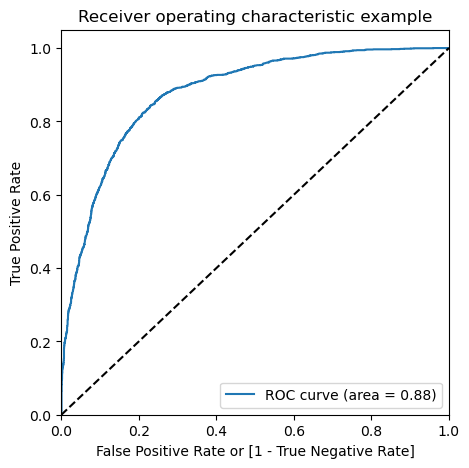

In [134]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 11: Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [135]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Cust_ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
3187          0        0.080916     3187          0    1    0    0    0    0   
2251          0        0.059757     2251          0    1    0    0    0    0   
438           0        0.208288      438          0    1    1    1    0    0   
627           0        0.188568      627          0    1    1    0    0    0   
339           0        0.066205      339          0    1    0    0    0    0   

      0.5  0.6  0.7  0.8  0.9  
3187    0    0    0    0    0  
2251    0    0    0    0    0  
438     0    0    0    0    0  
627     0    0    0    0    0  
339     0    0    0    0    0

In [136]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.366498  1.000000  0.000000
0.1   0.1  0.614280  0.971182  0.407803
0.2   0.2  0.749683  0.904323  0.660220
0.3   0.3  0.790241  0.858213  0.750917
0.4   0.4  0.808196  0.771182  0.829610
0.5   0.5  0.803971  0.668012  0.882628
0.6   0.6  0.792776  0.579251  0.916305
0.7   0.7  0.765948  0.465130  0.939980
0.8   0.8  0.743135  0.355620  0.967322
0.9   0.9  0.702366  0.204611  0.990330


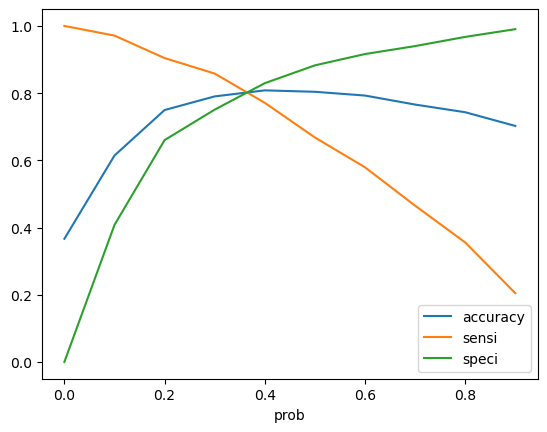

In [137]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

In [138]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Cust_ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
3187          0        0.080916     3187          0    1    0    0    0    0   
2251          0        0.059757     2251          0    1    0    0    0    0   
438           0        0.208288      438          0    1    1    1    0    0   
627           0        0.188568      627          0    1    1    0    0    0   
339           0        0.066205      339          0    1    0    0    0    0   

      0.5  0.6  0.7  0.8  0.9  final_predicted  
3187    0    0    0    0    0                0  
2251    0    0    0    0    0                0  
438     0    0    0    0    0                0  
627     0    0    0    0    0                0  
339     0    0    0    0    0                0

In [139]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8056611744824672

In [140]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2441,  558],
       [ 362, 1373]], dtype=int64)

In [141]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [142]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity = ',round(100*TP/(TP+FN),2),"%")
# Let us calculate specificity
print('Specificity = ',round(100*(TN/(TN+FP)),2),"%")
# Calculate false postive rate - predicting CONVERTED when customer does not have CONVERTED
print('False Postive Rate = ',round(100*(FP/(TN+FP)),2),"%")
# Positive predictive value or Precision
print('Positive Predictive value = ',round(100*(TP/(TP+FP)),2),"%")
# Negative predictive value
print('Negative Predictive value = ',round(100*(TN/(TN+ FN)),2),"%")

Sensitivity =  79.14 %
Specificity =  81.39 %
False Postive Rate =  18.61 %
Positive Predictive value =  71.1 %
Negative Predictive value =  87.09 %


### Step 12: Making predictions on the test set

In [143]:
 #Scaling numeric values
X_test[['total_visits','time_on_website','page_views_per_visit']] = scaler.transform(X_test[['total_visits','time_on_website','page_views_per_visit']])

In [144]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [145]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [146]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [147]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

converted  CustID         0
0          0    5997  0.743405
1          0    4882  0.210774
2          0    2955  0.024306
3          1    2303  0.920653
4          0     496  0.495876

In [148]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'converted_prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','converted','converted_prob'], axis=1)
y_pred_final.head()

CustID  converted  converted_prob
0    5997          0        0.743405
1    4882          0        0.210774
2    2955          0        0.024306
3    2303          1        0.920653
4     496          0        0.495876

In [149]:
y_pred_final['final_predicted'] = y_pred_final.converted_prob.map(lambda x: 1 if x > 0.38 else 0)
y_pred_final.head()

CustID  converted  converted_prob  final_predicted
0    5997          0        0.743405                1
1    4882          0        0.210774                0
2    2955          0        0.024306                0
3    2303          1        0.920653                1
4     496          0        0.495876                1

In [150]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.converted, y_pred_final.final_predicted)

0.7876847290640394

In [151]:
confusion_test = metrics.confusion_matrix(y_pred_final.converted, y_pred_final.final_predicted )
confusion_test

array([[1051,  235],
       [ 196,  548]], dtype=int64)

In [152]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [153]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity = ',round(100*TP/(TP+FN),2),"%")
# Let us calculate specificity
print('Specificity = ',round(100*(TN/(TN+FP)),2),"%")
# Calculate false postive rate - predicting CONVERTED when customer does not have CONVERTED
print('False Postive Rate = ',round(100*(FP/(TN+FP)),2),"%")
# Positive predictive value or Precision
print('Positive Predictive value = ',round(100*(TP/(TP+FP)),2),"%")
# Negative predictive value
print('Negative Predictive value = ',round(100*(TN/(TN+ FN)),2),"%")

Sensitivity =  73.66 %
Specificity =  81.73 %
False Postive Rate =  18.27 %
Positive Predictive value =  69.99 %
Negative Predictive value =  84.28 %


### Step 13: Assigning Lead_Score to leads from 0 to 100.

In [154]:
#Higher the score hotter the lead or higher chances of conversion of lead
#On_Training_Set
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map(lambda x : round(x*100))
y_train_pred_final.head()

Converted  Converted_Prob  Cust_ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
3187          0        0.080916     3187          0    1    0    0    0    0   
2251          0        0.059757     2251          0    1    0    0    0    0   
438           0        0.208288      438          0    1    1    1    0    0   
627           0        0.188568      627          0    1    1    0    0    0   
339           0        0.066205      339          0    1    0    0    0    0   

      0.5  0.6  0.7  0.8  0.9  final_predicted  Lead_Score  
3187    0    0    0    0    0                0           8  
2251    0    0    0    0    0                0           6  
438     0    0    0    0    0                0          21  
627     0    0    0    0    0                0          19  
339     0    0    0    0    0                0           7

In [155]:
#On_Test_Set
y_pred_final['Lead_Score'] = y_pred_final['converted_prob'].map(lambda x : round(x*100))
y_pred_final.head()

CustID  converted  converted_prob  final_predicted  Lead_Score
0    5997          0        0.743405                1          74
1    4882          0        0.210774                0          21
2    2955          0        0.024306                0           2
3    2303          1        0.920653                1          92
4     496          0        0.495876                1          50

We have finished our model building process here, and go the results as follows - 

- <u>Results on Train Set<u>-
    
    - Model Accuracy - 80.56 %  
    - Sensitivity - 79.14 %
    - Specificity - 81.39 %
    - Precision - 71.1 %
    
- <u>Results on Test Set<u>-
    
    - Model Accuracy - 78.76 % 
    - Sensitivity - 73.66 %
    - Specificity - 81.73 %
    - Precision - 69.99 %
    
- We have looked at Sensitivity & Specificity Matrix of evaluation for model building.
- Ther is one more matrix i.e., Precison & Recall Matrix, lets build model with this and check accuracy.
- If we will not get improved accuracy with later we will finalize this as final evaluation matrix and model.

## Precision and Recall

In [156]:
#Looking at the confusion matrix which we got on training data set
confusion2

array([[2441,  558],
       [ 362, 1373]], dtype=int64)

In [157]:
from sklearn.metrics import precision_score, recall_score

In [158]:
100*(round(precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),4))

71.1

In [159]:
100*(round(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),4))

79.14

In [160]:
# Let's see the sensitivity or Recall of our logistic regression model
print('Sensitivity = ',round(100*confusion2[1,1]/(confusion2[1,1]+confusion2[1,0]),2),"%")

# Positive predictive value or Precision
print('Positive Predictive value = ',round(100*(confusion2[1,1]/(confusion2[1,1]+confusion2[0,1])),2),"%")


Sensitivity =  79.14 %
Positive Predictive value =  71.1 %


To check, we have calculated Precision and Recal values both from inbuilt function and manually and they are same.

### Precision and Recall Tradeoff

In [161]:
from sklearn.metrics import precision_recall_curve

In [162]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

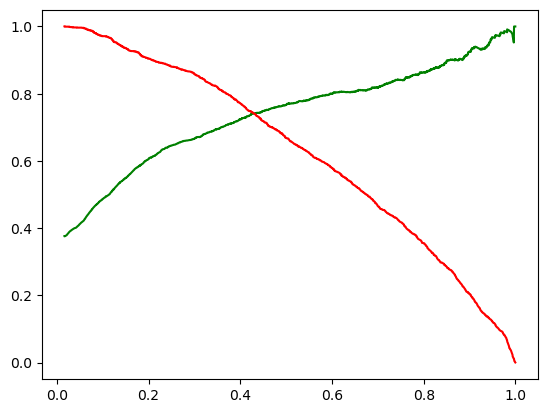

In [163]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### From the curve above, 0.42 is the optimum point to take it as a cutoff probability.

In [164]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Cust_ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
3187          0        0.080916     3187          0    1    0    0    0    0   
2251          0        0.059757     2251          0    1    0    0    0    0   
438           0        0.208288      438          0    1    1    1    0    0   
627           0        0.188568      627          0    1    1    0    0    0   
339           0        0.066205      339          0    1    0    0    0    0   

      0.5  0.6  0.7  0.8  0.9  final_predicted  Lead_Score  
3187    0    0    0    0    0                0           8  
2251    0    0    0    0    0                0           6  
438     0    0    0    0    0                0          21  
627     0    0    0    0    0                0          19  
339     0    0    0    0    0                0           7

In [165]:
confusion_p_r = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_p_r

array([[2532,  467],
       [ 436, 1299]], dtype=int64)

In [166]:
round((metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)*100),2)

80.93

In [167]:
TP = confusion_p_r[1,1] # true positive 
TN = confusion_p_r[0,0] # true negatives
FP = confusion_p_r[0,1] # false positives
FN = confusion_p_r[1,0] # false negatives

In [168]:
# Let's see the sensitivity or Recall of our logistic regression model
print('Recall = ',round(100*TP/(TP+FN),2),"%")

# Positive predictive value or Precision
print('Precision = ',round(100*(TP/(TP+FP)),2),"%")

Recall =  74.87 %
Precision =  73.56 %


### Step 12: Making predictions on the test set

In [169]:
y_pred_final['final_predicted'] = y_pred_final.converted_prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

CustID  converted  converted_prob  final_predicted  Lead_Score
0    5997          0        0.743405                1          74
1    4882          0        0.210774                0          21
2    2955          0        0.024306                0           2
3    2303          1        0.920653                1          92
4     496          0        0.495876                1          50

In [170]:
# Let's check the overall accuracy.
round((metrics.accuracy_score(y_pred_final.converted, y_pred_final.final_predicted)*100),2)

79.21

In [171]:
confusion_test_pr = metrics.confusion_matrix(y_pred_final.converted, y_pred_final.final_predicted )
confusion_test_pr

array([[1083,  203],
       [ 219,  525]], dtype=int64)

In [172]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [173]:
# Let's see the sensitivity or Recall of our logistic regression model
print('Recall = ',round(100*confusion_test[1,1]/(confusion_test[1,1]+confusion_test[1,0]),2),"%")

# Positive predictive value or Precision
print('Precision = ',round(100*(confusion_test[1,1]/(confusion_test[1,1]+confusion_test[0,1])),2),"%")

Recall =  73.66 %
Precision =  69.99 %


### <u> Final Oberservations & Conclusion-

**1. Using Sensitivity & Specificity as Evaluation Matrix-**

- <u>Results on Train Set<u>-
    
    - Model Accuracy - 80.56 %  
    - Sensitivity - 79.14 %
    - Specificity - 81.39 %
    - Precision - 71.1 %
    
- <u>Results on Test Set<u>-
    
    - Model Accuracy - 78.76 % 
    - Sensitivity - 73.66 %
    - Specificity - 81.73 %
    - Precision - 69.99 %
    
   
**2. Using Precision & Recall as Evaluation Matrix-**
    
- <u>Results on Train Set<u>-
    
    - Model Accuracy - 80.93 %
    - Precision - 73.56 %
    - Recall - 74.87 %
    
- <u>Results on Test Set<u>-
    
    - Model Accuracy - 79.21 % 
    - Precision - 69.99 %
    - Recall - 73.66 %

#### MATRIX EVALUATION

- We have not got any much imporved accuracy on "Precision & Recall" model, it is approx. same that we got with "Sensitivity & Specificity" model.

- Now, we can have 2 goals-
    - 1. Identifying the most promising leads with a high probability of converting to sales.
    - 2. Capture as many potential conversions as possible.
- In the first case our goal should be to maximize precison. By maximizing precision, we can ensure that the sales team is focusing their efforts on the leads that are most likely to convert, which can increase the overall efficiency and effectiveness of the sales process.

- In the second case our goal should be to maximize recall. By maximizing recall, we can capture more potential conversions, even if it means some false positives are also included in the list.

- As per the business problem we have to maximize the conversion rate i.e., we have to focus more on percision. But if we see precison value on test set we got from both evaluation matrices, they are approximately same ~ 70%. Also the recall(sensitivity) values are same ~74%.
- So, the decisoin come to accuracy of the model that is also same, just a little more in precision-recall evaluation matrix. So, finalizing that model with threshold cutoff of **0.42**.
